# First things first
---
**Objective:** The purpose of this notebook is to analyse the gender distribution of Federal University of Rio Grande do Norte's employees. The data was scrapped from the federal government transparency portal and the gender is not available in the transparency portal.

**Participants:**
 <ul>
     <li>Marco Olimpio - marco.olimpio at gmail </li>
     <li>Rebecca Betwel - bekbetwel at gmail </li>    
 </ul>

---

**Detailed explanation**
<div style="text:justify">In this notebook we have to analyse the gender name of UFRN's employees. This list of employes could be requested from the Government Transparency Portal - http://www.portaldatransparencia.gov.br/. In this portal there is a list of all government bodys including the employees related to each one. To be precise about the part that concerns UFRN the url requested could be: http://www.portaldatransparencia.gov.br/servidores/OrgaoExercicio-ListaServidores.asp?CodOS=15000&DescOS=MINISTERIO%20DA%20EDUCACAO&CodOrg=26243&DescOrg=UNIVERSIDADE%20FED.%20DO%20RIO%20GRANDE%20DO%20NORTE&Pagina=1&TextoPesquisa=

In this scenario we have to request and process all 413 pages contaning the names of the UFRN's employees and run an analysis based on the name of then. This method is called web scrapping and we could utilize the Beatfulsoup library to make the scrapping and after run an analysis of gender.</div>

**Topics**
- [Scrapping](#scrapping)
- [Tool number 1 - Namsor](#namsor)
- Tool number 2 - Gender Guesser
- Tool number 3 - Py Gender BR
- Tool number 4 - Bayesian gender
- Comparing tools
- [EDA - UFRN Gender in numbers](#eda)

<a id='scrapping'></a>
## Web Scrapping
<hr>

According to Wikipedia (https://en.wikipedia.org/wiki/Web_scraping) web scrapping is a technique in witch the computer programm acquire data from human readble documents from internet. One of the most famous libraries used in python stack is the beautiful soup - https://www.crummy.com/software/BeautifulSoup/. You can easylly install it executing the command:

>```python
!pip install beautifulsoup
```

---


### The scrapper

---

<div style="text-align:justify">
Making a visit to
<br/>
<div style="text-align:center">
<a href="http://www.portaldatransparencia.gov.br/servidores/OrgaoExercicio-ListaServidores.asp?CodOS=15000&DescOS=MINISTERIO%20DA%20EDUCACAO&CodOrg=26243&DescOrg=UNIVERSIDADE%20FED.%20DO%20RIO%20GRANDE%20DO%20NORTE&Pagina=1&TextoPesquisa=" target="_NEW">UFRN's Transparency Portal</a>
</div>
<br/>
we could see that we have a list of people's name and it constitutes the level 1 of information acquired. This list now is constituded of 413 pages. Each person's name has a link to a specification of what the person does, how long it is working in the organization and more and this constitutes the level two of data aquired. You could also notice that in the level two there is a link that points to a level three. The level three show how much the person receives, paycheck, how much taxes the person pays and other info.
<br/>
<br/>
<br/>
The scrapping algorithm made to acquire all these data is
<br/>
</div>

* Interate throwgh all page data
    * Interate throwgh all person names
        * Retrieve link to level two page
        * Call retrieveinfo_level_two passing URL to level two (this acquire all info about level two page)
            * Call retrieveinfo_level_three passing URL to level three (this acquire all info about level three page)


<div style="text-align:justify">            
All processes of acquiring this data took about 6,5 hours. In this process we could detect that people that are medical residents and military were not acquired (level two and level three information only level one)
</div>

<div style="text-align:center">
<img src="./scrapping.png"/>
</div>

Importing libraries needed

In [193]:
#Loading libraries needed

#System libraries
import os
import sys

from datetime import date
##GeoJson data and services returned info
import json

import re
import requests

import urllib
from urllib.request import urlopen

from bs4 import BeautifulSoup as bs

#Basic libraries for data analysis
import numpy as np
from numpy import random
import pandas as pd


# Loaing visualization libraries
#Jupyter Magic word to inline matplotlib plots
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn
#Inline bokeh charts
output_notebook()
from bokeh.io import push_notebook, show, output_notebook, output_file
from bokeh.layouts import row
from bokeh.plotting import figure
from bokeh.sampledata.commits import data
from bokeh.models import (
    GMapPlot, GMapOptions, ColumnDataSource, Circle, DataRange1d, PanTool, WheelZoomTool, BoxSelectTool, Jitter
)
from bokeh.core.properties import field

#Choropleth necessary libraries
##Necessary to create shapes in folium
from shapely.geometry import Polygon
from shapely.geometry import Point
##Choropleth itself
import folium
##Colormap
from branca.colormap import linear

Loading BokehJS ...

Function to retrieve information of the level two of information

In [30]:
def retrieveinfo_level_two(url):
    '''Retries data from the http://www.portaldatransparencia.gov.br/servidores/OrgaoExercicio-DetalhaServidor.asp '''
    employee_enrollment = 0
    employee_responsability = 0
    employee_responsability_class = 0
    employee_responsability_pattern = 0
    employee_responsability_reference = 0
    employee_responsability_level = 0
    employee_UF = 0
    employee_UORG = 0
    employee_legal_regime = 0
    employee_activit = 0
    employee_absence_from_work = 0
    employee_work_time = 0
    employee_last_job_responsability_modification_date = 0
    employee_job_responsability_nominee_date = 0
    employee_job_responsability_nominee_act = 0
    employee_last_job_responsability_modification_date_body = 0
    employee_entrance_public_service_legal_document = 0
    employee_entrance_public_service_legal_document_number  = 0
    employee_entrance_public_service_legal_document_date = 0
    responsability_description = 0
    responsability_activity = 0
    responsability_activity_parcial = 0
    responsability_UF = 0
    responsability_UORG = 0
    responsability_last_data_change_resp = 0
    responsability_sup_body = 0
    
    try:
        r = requests.post(url)
        s = bs(r.content,"html")

        #First part - retrive
        #print(len(s.find_all('table')))
        if len(s.find_all('table')) <=4:
            rows = s.find_all('table')[1].find_all('tr')

            employee_enrollment                                     = rows[2].findAll('td')[1].get_text(strip=True)
            employee_responsability                                 = rows[3].findAll('td')[1].get_text(strip=True)
            employee_responsability_class                           = rows[4].findAll('td')[1].get_text(strip=True)
            employee_responsability_pattern                         = rows[5].findAll('td')[1].get_text(strip=True)
            employee_responsability_reference                       = rows[6].findAll('td')[1].get_text(strip=True)
            employee_responsability_level                           = rows[7].findAll('td')[1].get_text(strip=True)

            employee_UF                                             = rows[9].findAll('td')[1].get_text(strip=True)
            employee_UORG                                           = rows[10].findAll('td')[1].get_text(strip=True)

            employee_legal_regime                                   = rows[17].findAll('td')[1].get_text(strip=True)
            employee_activit                                        = rows[18].findAll('td')[1].get_text(strip=True)
            employee_absence_from_work                              = rows[19].findAll('td')[1].get_text(strip=True)
            employee_work_time                                      = rows[20].findAll('td')[1].get_text(strip=True)

            employee_last_job_responsability_modification_date      = rows[21].findAll('td')[1].get_text(strip=True)
            employee_job_responsability_nominee_date                = rows[22].findAll('td')[1].get_text(strip=True)
            employee_job_responsability_nominee_act                 = rows[23].findAll('td')[1].get_text(strip=True)
            employee_last_job_responsability_modification_date_body = rows[24].findAll('td')[1].get_text(strip=True)

            employee_entrance_public_service_legal_document        = rows[27].findAll('td')[1].get_text(strip=True)
            employee_entrance_public_service_legal_document_number = rows[28].findAll('td')[1].get_text(strip=True)
            employee_entrance_public_service_legal_document_date   = rows[29].findAll('td')[1].get_text(strip=True)
        else:
            #Employee
            rows = s.find_all('table')[3].find_all('tr')

            employee_enrollment                                     = rows[1].findAll('td')[1].get_text(strip=True)
            employee_responsability                                 = rows[2].findAll('td')[1].get_text(strip=True)
            employee_responsability_class                           = rows[3].findAll('td')[1].get_text(strip=True)
            employee_responsability_pattern                         = rows[4].findAll('td')[1].get_text(strip=True)
            employee_responsability_reference                       = rows[5].findAll('td')[1].get_text(strip=True)
            employee_responsability_level                           = rows[6].findAll('td')[1].get_text(strip=True)

            employee_UF                                             = ''#rows[9].findAll('td')[1].get_text(strip=True)
            employee_UORG                                           = rows[8].findAll('td')[1].get_text(strip=True)

            employee_legal_regime                                   = rows[16].findAll('td')[1].get_text(strip=True)
            employee_activit                                        = rows[17].findAll('td')[1].get_text(strip=True)
            employee_absence_from_work                              = rows[18].findAll('td')[1].get_text(strip=True)
            employee_work_time                                      = rows[19].findAll('td')[1].get_text(strip=True)

            employee_last_job_responsability_modification_date      = rows[20].findAll('td')[1].get_text(strip=True)
            employee_job_responsability_nominee_date                = rows[21].findAll('td')[1].get_text(strip=True)
            employee_job_responsability_nominee_act                 = rows[22].findAll('td')[1].get_text(strip=True)
            employee_last_job_responsability_modification_date_body = rows[23].findAll('td')[1].get_text(strip=True)

            employee_entrance_public_service_legal_document        = rows[26].findAll('td')[1].get_text(strip=True)
            employee_entrance_public_service_legal_document_number = rows[27].findAll('td')[1].get_text(strip=True)
            employee_entrance_public_service_legal_document_date   = rows[28].findAll('td')[1].get_text(strip=True)

            #Responsabilitie
            rows = s.find_all('table')[2].find_all('tr')

            responsability_description                              = rows[3].findAll('td')[1].get_text(strip=True)
            responsability_activity                                 = rows[4].findAll('td')[1].get_text(strip=True)
            responsability_activity_parcial                         = rows[6].findAll('td')[1].get_text(strip=True)

            responsability_UF                                       = rows[7].findAll('td')[1].get_text(strip=True)
            employee_UF = responsability_UF
            responsability_UORG                                     = rows[9].findAll('td')[1].get_text(strip=True)
            responsability_sup_body                                 = rows[10].findAll('td')[1].get_text(strip=True)

            responsability_last_data_change_resp                    = rows[19].findAll('td')[1].get_text(strip=True)


        #Second part - retrive link to paycheck info and retrieve info about it
        link = s.findAll("a", { "title" : "Remuneração individual do servidor" })
        url_level_three = 'http://www.portaldatransparencia.gov.br' + link[0].get('href')
        #print(url_level_three)
        print("    L2 - OK")

        return [employee_enrollment, employee_responsability, employee_responsability_class, employee_responsability_pattern, employee_responsability_reference, employee_responsability_level, employee_UF, employee_UORG, employee_legal_regime, employee_activit, employee_absence_from_work, employee_work_time, employee_last_job_responsability_modification_date, employee_job_responsability_nominee_date, employee_job_responsability_nominee_act, employee_last_job_responsability_modification_date_body, employee_entrance_public_service_legal_document, employee_entrance_public_service_legal_document_number , employee_entrance_public_service_legal_document_date, responsability_description, responsability_activity, responsability_activity_parcial, responsability_UF, responsability_UORG, responsability_sup_body, responsability_last_data_change_resp, url_level_three]
    except:
        pass
        print("    L2 - NOINFO/FAIL URL: " + url)
    
    return [0, '', 0, 0, 0, 0, '', '', '', '', '', '', '', '', '', '', '', 0, '', '', '', '', '', '', '', '', '']

Function to retrieve level three of information

In [28]:
def retrieveinfo_level_three(url):
    '''Retries data from http://www.portaldatransparencia.gov.br/servidores/Servidor-DetalhaRemuneracao.asp'''
    emp_year = 0
    emp_tot_paycheck = 0
    emp_event_paycheck = 0
    emp_13_paycheck = 0
    emp_paid_vacation = 0
    emp_other = 0
    emp_irrf = 0
    emp_rgps = 0
    emp_paycheck_after_deduction = 0
    emp_other_receivings = 0
    emp_other_deduction = 0
    month_dict = {'janeiro':1, 'fevereiro':2, 'março':3, 'abril':4, 'maio':5, 'junho':6, 'julho':7, 'agosto':8, 'setembro':9, 'outubro':10, 'novembro':11, 'dezembro':12}

    try:
        r = requests.post(url)
        s = bs(r.content,"html")
        rows = s.find_all('tbody')[1].find_all('tr')
        counterPaycheck = 0
        emp_month = 9
        emp_year = 2017
        
        if len(s.find_all('tbody')[1].find_all('tr'))<10:
            print("        L3 OK - NO INFO")
            return [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    
        else:
            #Remuneração básica bruta
            if(len(rows[4].findAll('td')[2].get_text(strip=True))>0):
                emp_tot_paycheck = re.sub('[\.]+','',rows[4].findAll('td')[2].get_text(strip=True))
                emp_tot_paycheck = re.sub(',','.',emp_tot_paycheck)
            else:
                emp_tot_paycheck = 0.00

            if(len(rows[7].findAll('td')[2].get_text(strip=True))>0):
                    emp_irrf = re.sub('[\.]+','',rows[7].findAll('td')[2].get_text(strip=True))
                    emp_irrf = re.sub(',','.',emp_irrf)
            else:
                emp_irrf = 0.00

            if(len(rows[8].findAll('td')[2].get_text(strip=True))>0):
                emp_rgps = re.sub('[\.]+','',rows[8].findAll('td')[2].get_text(strip=True))
                emp_rgps = re.sub(',','.',emp_rgps)
            else:
                emp_rgps = 0.00

            if len(s.find_all('tbody')[1].find_all('tr'))==21:

                if(len(rows[11].findAll('td')[2].get_text(strip=True))>0):
                    emp_other_deduction = re.sub('[\.]+','',rows[11].findAll('td')[2].get_text(strip=True))
                    emp_other_deduction = re.sub(',','.',emp_other_deduction)
                else:
                    emp_rgps = 0.00

                if(len(rows[13].findAll('td')[1].get_text(strip=True))>0):
                    emp_paycheck_after_deduction = re.sub('[\.]+','',rows[13].findAll('td')[1].get_text(strip=True))
                    emp_paycheck_after_deduction = re.sub(',','.',emp_paycheck_after_deduction)
                else:
                    emp_paycheck_after_deduction = 0.00

                if(len(rows[18].findAll('td')[2].get_text(strip=True))>0):
                    emp_other_receivings = re.sub('[\.]+','',rows[18].findAll('td')[2].get_text(strip=True))
                    emp_other_receivings = re.sub(',','.',emp_other_receivings)    
                else:
                    emp_other_receivings = 0.00

            else:

                if(len(rows[10].findAll('td')[1].get_text(strip=True))>0):
                    emp_paycheck_after_deduction = re.sub('[\.]+','',rows[10].findAll('td')[1].get_text(strip=True))
                    emp_paycheck_after_deduction = re.sub(',','.',emp_paycheck_after_deduction)
                else:
                    emp_paycheck_after_deduction = 0.00

                if(len(rows[15].findAll('td')[2].get_text(strip=True))>0):
                    emp_other_receivings = re.sub('[\.]+','',rows[15].findAll('td')[2].get_text(strip=True))
                    emp_other_receivings = re.sub(',','.',emp_other_receivings)    
                else:
                    emp_other_receivings = 0.00
            
        print("        L3 OK")
        url=""
        return [emp_month, emp_year, emp_tot_paycheck, emp_irrf, emp_rgps, emp_other_deduction, emp_paycheck_after_deduction, emp_other_receivings]
    except:        
        url=""
        print("        Level THREE - FAIL URL: " + url)
    
    return [0, 0, 0, 0, 0, 0, 0, 0]

Main part of the web scrapping. The iteration about the employees of UFRN.

In [36]:
#store data crawled
ufrnEmployeList = []
counter= 0
debug = False
#This method iterates through all the pages from the UFRN transparency page
try:
    for x in range(1,413):
        url = "http://www.portaldatransparencia.gov.br/servidores/OrgaoExercicio-ListaServidores.asp?CodOS=15000&DescOS=MINISTERIO%20DA%20EDUCACAO&CodOrg=26243&DescOrg=UNIVERSIDADE%20FED.%20DO%20RIO%20GRANDE%20DO%20NORTE&Pagina="+ str(x) +"+&TextoPesquisa="
        print("L1 - " + str(x) +'/413 - ' + str((x/413)*100) + '% pages loaded...0')
        r = requests.post(url)
        s = bs(r.content,"html")

        rows = s.find_all('table')[1].find_all('tr')

        counter= 0
        # Iterate through all lines 'tr'
        for row in rows:

            counter = counter + 1
            if counter == 1:
                continue

            #Take all the columns
            tdList = row.findAll('td')

            #Employee's CPF
            cpf = tdList[0].get_text(strip=True)

            #Employee's detail link
            hrefList = tdList[1].find_all('a')
            empHref = hrefList[0].get('href')

            #Employee's name
            name = tdList[1].get_text(strip=True)

            aux = [cpf, empHref, name]
            print("  L2")
            return_level_two = retrieveinfo_level_two("http://www.portaldatransparencia.gov.br/servidores/" + str(empHref))
            print("    L3")
            if(len(return_level_two[-1])>150):
                return_level_three = retrieveinfo_level_three(return_level_two[-1])
            else:
                print("    L2 - No link to L3")
                
            aux = aux + return_level_two + return_level_three
            ufrnEmployeList.append(aux)
            
            if debub:
                break
        if debub:
            break

except:
    print("L1 - Issues on page " + str(x) + " Line: " + str(counter) + " URL: " + str(url))
    pass
    
    
print("Number of employees aquired: " + str(len(ufrnEmployeList)))
for em in ufrnEmployeList:
    print(em)

L1 - 1/413 - 0.24213075060532688% pages loaded...0


/Users/marco/anaconda/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/marco/anaconda/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


  L2
    L2 - OK
    L3
        L3 OK - NO INFO
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - NOINFO/FAIL URL: http://www.portaldatransparencia.gov.br/servidores/OrgaoExercicio-DetalhaServidor.asp?IdServidor=2080611&CodOrgao=26243
    L3
    L2 - No link to L3
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - NOINFO/FAIL URL: http://www.portaldatransparencia.gov.br/servidores/OrgaoExercicio-DetalhaServidor.asp?IdServidor=1033044&CodOrgao=26243
    L3
    L2 - No link to L3
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
L1 - 2/413 - 0.48426150121065376% pages loaded...0
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
  

  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
L1 - 12/413 - 2.9055690072639226% pages loaded...0
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - NOINFO/FAIL URL: http://www.portaldatransparencia.gov.br/servidores/OrgaoExercicio-DetalhaServidor.asp?IdServidor=2257904&CodOrgao=26243
    L3
    L2 - No link to L3
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
   

    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - NOINFO/FAIL URL: http://www.portaldatransparencia.gov.br/servidores/OrgaoExercicio-DetalhaServidor.asp?IdServidor=2093434&CodOrgao=26243
    L3
    L2 - No link to L3
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - NOINFO/FAIL URL: http://www.portaldatransparencia.gov.br/servidores/OrgaoExercicio-DetalhaServidor.asp?IdServidor=2086456&CodOrgao=26243
    L3
    L2 - No link to L3
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
L1 - 22/413 - 5.326876513317192% pages loaded...0
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3

    L2 - OK
    L3
        L3 OK
  L2
    L2 - NOINFO/FAIL URL: http://www.portaldatransparencia.gov.br/servidores/OrgaoExercicio-DetalhaServidor.asp?IdServidor=2155641&CodOrgao=26243
    L3
    L2 - No link to L3
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - NOINFO/FAIL URL: http://www.portaldatransparencia.gov.br/servidores/OrgaoExercicio-DetalhaServidor.asp?IdServidor=2250463&CodOrgao=26243
    L3
    L2 - No link to L3
  L2
    L2 - OK
    L3
        L3 OK
L1 - 30/413 - 7.263922518159806% pages loaded...0
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3

    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
L1 - 40/413 - 9.685230024213075% pages loaded...0
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - NOINFO/FAIL URL: http://www.portaldatransparencia.gov.br/servidores/OrgaoExercicio-DetalhaServidor.asp?IdServidor=2251091&CodOrgao=26243
    L3
    L2 - No link to L3
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - NOINFO/FAIL URL: http://www.portaldatransparencia.gov.br/servidores/OrgaoExercicio-DetalhaServidor.asp?IdServidor=2252027&CodOrgao=26243
    L3
    L2 - No link to L3
  L2
    L2 - OK
    L3

    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
L1 - 51/413 - 12.34866828087167% pages loaded...0
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - NOINFO/FAIL URL: http://www.portaldatransparencia.gov.br/servidores/OrgaoExercicio-DetalhaServidor.asp?IdServidor=1877818&CodOrgao=26243
    L3
    L2 - No link to L3
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - 

    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - NOINFO/FAIL URL: http://www.portaldatransparencia.gov.br/servidores/OrgaoExercicio-DetalhaServidor.asp?IdServidor=2253708&CodOrgao=26243
    L3
    L2 - No link to L3
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - NOINFO/FAIL URL: http://www.portaldatransparencia.gov.br/servidores/OrgaoExercicio-DetalhaServidor.asp?IdServidor=2255336&CodOrgao=26243
    L3
    L2 - No link to L3
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
L1 - 60/413 - 14.527845036319611% pages loaded...0
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - NOINFO/FAIL URL: http://www.portaldatransparencia.gov.br/servidores/OrgaoExercicio-D

  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
L1 - 70/413 - 16.94915254237288% pages loaded...0
  L2
    L2 - NOINFO/FAIL URL: http://www.portaldatransparencia.gov.br/servidores/OrgaoExercicio-DetalhaServidor.asp?IdServidor=1701929&CodOrgao=26243
    L3
    L2 - No link to L3
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    

    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - NOINFO/FAIL URL: http://www.portaldatransparencia.gov.br/servidores/OrgaoExercicio-DetalhaServidor.asp?IdServidor=2253414&CodOrgao=26243
    L3
    L2 - No link to L3
  L2
    L2 - OK
    L3
        L3 OK - NO INFO
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - NOINFO/FAIL URL: http://www.portaldatransparencia.gov.br/servidores/OrgaoExercicio-DetalhaServidor.asp?IdServidor=2249530&CodOrgao=26243
    L3
    L2 - No link to L3
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
L1 - 81/413 - 19.612590799031477% pages loaded...0
  L2
    L2 - NOINFO/FAIL URL: http://www.portaldatransparencia.gov.br/servidores/OrgaoExercicio-DetalhaServidor.asp?IdServidor=1721222&CodOrgao=26243
    L3
    L2

    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
L1 - 90/413 - 21.791767554479417% pages loaded...0
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - NOINFO/FAIL URL: http://www.portaldatransparencia.gov.br/servidores/OrgaoExercicio-DetalhaServidor.asp?IdServidor=2249955&CodOrgao=26243
    L3
    L2 - No link to L3
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - NOINFO/FAIL URL: http://www.portaldatransparencia.gov.br/servidores/OrgaoExercicio-DetalhaServidor.asp?IdServidor=2123426&CodOrgao=26243
    L3
    L2 - No link to L3
L1 - 91/413 - 22.03389

  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - NOINFO/FAIL URL: http://www.portaldatransparencia.gov.br/servidores/OrgaoExercicio-DetalhaServidor.asp?IdServidor=2091198&CodOrgao=26243
    L3
    L2 - No link to L3
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - NOINFO/FAIL URL: http://www.portaldatransparencia.gov.br/servidores/OrgaoExercicio-DetalhaServidor.asp?IdServidor=2082021&CodOrgao=26243
    L3
    L2 - No link to L3
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
L1 - 102/413 - 24.69733656174334% pages loaded...0
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK


        L3 OK
  L2
    L2 - NOINFO/FAIL URL: http://www.portaldatransparencia.gov.br/servidores/OrgaoExercicio-DetalhaServidor.asp?IdServidor=2162255&CodOrgao=26243
    L3
    L2 - No link to L3
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - NOINFO/FAIL URL: http://www.portaldatransparencia.gov.br/servidores/OrgaoExercicio-DetalhaServidor.asp?IdServidor=2251909&CodOrgao=26243
    L3
    L2 - No link to L3
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        Level THREE - FAIL URL: 
L1 - 112/413 - 27.11864406779661% pages loaded...0
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L

    L2 - NOINFO/FAIL URL: http://www.portaldatransparencia.gov.br/servidores/OrgaoExercicio-DetalhaServidor.asp?IdServidor=2260163&CodOrgao=26243
    L3
    L2 - No link to L3
  L2
    L2 - OK
    L3
        L3 OK
L1 - 122/413 - 29.539951573849876% pages loaded...0
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        Level THREE - FAIL URL: 
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - NOINFO/FAIL URL: http://www.portaldatransparencia.gov.br/servidores/OrgaoExercicio-DetalhaServidor.asp?IdServidor=2249915&CodOrgao=26243
    L3
    L2 - No link to L3
  L2
    L2 - OK
    L3
        L3 OK - NO INFO
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - NOINFO/FAIL URL: http://www.portaldatransparencia.gov.br/servidores/OrgaoExercicio-DetalhaServidor.asp?IdServidor=2158331&CodOrgao=26243
    L3
    L2 - No link to L3
 

    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - NOINFO/FAIL URL: http://www.portaldatransparencia.gov.br/servidores/OrgaoExercicio-DetalhaServidor.asp?IdServidor=1136781&CodOrgao=26243
    L3
    L2 - No link to L3
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
L1 - 132/413 - 31.961259079903147% pages loaded...0
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 

    L2 - OK
    L3
        L3 OK
  L2
    L2 - NOINFO/FAIL URL: http://www.portaldatransparencia.gov.br/servidores/OrgaoExercicio-DetalhaServidor.asp?IdServidor=2106797&CodOrgao=26243
    L3
    L2 - No link to L3
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
L1 - 143/413 - 34.624697336561745% pages loaded...0
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - NOINFO/FAIL URL: http://www.portaldatransparencia.gov.br/servidores/OrgaoExercicio-DetalhaServidor.asp?IdServidor=2256398&CodOrgao=26243
    L3
    L2

        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
L1 - 153/413 - 37.04600484261501% pages loaded...0
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - NOINFO/FAIL URL: http://www.portaldatransparencia.gov.br/servidores/OrgaoExercicio-DetalhaServidor.asp?IdServidor=2258303&CodOrgao=26243
    L3
    L2 - No link to L3
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
L1 - 154/413 - 37.28813559322034% pages loaded...0
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
  

    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - NOINFO/FAIL URL: http://www.portaldatransparencia.gov.br/servidores/OrgaoExercicio-DetalhaServidor.asp?IdServidor=1714235&CodOrgao=26243
    L3
    L2 - No link to L3
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - NOINFO/FAIL URL: http://www.portaldatransparencia.gov.br/servidores/OrgaoExercicio-DetalhaServidor.asp?IdServidor=2100816&CodOrgao=26243
    L3
    L2 - No link to L3
L1 - 163/413 - 39.46731234866828% pages loaded...0
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - NOINFO/FAIL URL: http://www.portaldatransparencia.gov.br/servidores/OrgaoExercicio-DetalhaServidor.asp?IdServidor=1126196&

    L2 - OK
    L3
        L3 OK
L1 - 172/413 - 41.64648910411623% pages loaded...0
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        Level THREE - FAIL URL: 
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - NOINFO/FAIL URL: http://www.portaldatransparencia.gov.br/servidores/OrgaoExercicio-DetalhaServidor.asp?IdServidor=2089666&CodOrgao=26243
    L3
    L2 - No link to L3
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
L1 - 173/413 - 41.88861985472155% pages loaded...0
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
  

        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
L1 - 183/413 - 44.30992736077482% pages loaded...0
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - NOINFO/FAIL URL: http://www.portaldatransparencia.gov.br/servidores/OrgaoExercicio-DetalhaServidor.asp?IdServidor=2105989&CodOrgao=26243
    L3
    L2 - No link to L3
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - NOINFO/FAIL URL: http://www.portaldatransparencia.gov.br/servidores/OrgaoExercicio-DetalhaServidor.asp?IdServidor=2078835&CodOrgao=26243
    L3
    L2 - No link to L3
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - NOINFO/FAIL URL: http://www.portaldatransparencia.gov.br/servidores/OrgaoExercicio-DetalhaServidor.asp?IdServidor=2257293&CodOrgao=26243
    L3
    L2 - No link to L3
  L2
    L2 

        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - NOINFO/FAIL URL: http://www.portaldatransparencia.gov.br/servidores/OrgaoExercicio-DetalhaServidor.asp?IdServidor=2098129&CodOrgao=26243
    L3
    L2 - No link to L3
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
L1 - 194/413 - 46.973365617433416% pages loaded...0
  L2
    L2 - NOINFO/FAIL URL: http://www.portaldatransparencia.gov.br/servidores/OrgaoExercicio-DetalhaServidor.asp?IdServidor=2253327&CodOrgao=26243
    L3
    L2 - No link to L3
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  

    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
L1 - 205/413 - 49.63680387409201% pages loaded...0
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - NOINFO/FAIL URL: http://www.portaldatransparencia.gov.br/servidores/OrgaoExercicio-DetalhaServidor.asp?IdServidor=1944817&CodOrgao=26243
    L3
    L2 - No link to L3
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
L1 - 206/413 - 49.87893462469734% pages loaded...0
  L2
    L2 - OK
    L3
        L3 OK


        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - NOINFO/FAIL URL: http://www.portaldatransparencia.gov.br/servidores/OrgaoExercicio-DetalhaServidor.asp?IdServidor=1387604&CodOrgao=26243
    L3
    L2 - No link to L3
  L2
    L2 - OK
    L3
        L3 OK - NO INFO
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
L1 - 216/413 - 52.300242130750604% pages loaded...0
  L2
    L2 - NOINFO/FAIL URL: http://www.portaldatransparencia.gov.br/servidores/OrgaoExercicio-DetalhaServidor.asp?IdServidor=1781106&CodOrgao=26243
    L3
    L2 - No link to L3
  L2
    L2 - NOINFO/FAIL URL: http://www.portaldatransparencia.gov.br/servidores/OrgaoExercicio-DetalhaServidor.asp?IdServidor=2256609&CodOrgao=26243
    L3
    L2 - No link to L3
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
 

        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - NOINFO/FAIL URL: http://www.portaldatransparencia.gov.br/servidores/OrgaoExercicio-DetalhaServidor.asp?IdServidor=2255465&CodOrgao=26243
    L3
    L2 - No link to L3
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
L1 - 226/413 - 54.72154963680388% pages loaded...0
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - NOINFO/FAIL URL: http://www.portaldatransparencia.gov.br/servidores/OrgaoExercicio-DetalhaServidor.asp?IdServidor=2250730&CodOrgao=26243
    L3
    L2 - No link to L3
  L2
    L2 - OK
    L3
        L3 OK
  L

    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
L1 - 234/413 - 56.65859564164649% pages loaded...0
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - NOINFO/FAIL URL: http://www.portaldatransparencia.gov.br/servidores/OrgaoExercicio-DetalhaServidor.asp?IdServidor=2256701&CodOrgao=26243
    L3
    L2 - No link to L3
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - NOINFO/FAIL URL: http://www.portaldatransparencia.gov.br/servidores/OrgaoExercicio-DetalhaServidor.asp?IdServidor=2258957&CodOrgao=26243
    L3
    L2 

    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
L1 - 243/413 - 58.83777239709443% pages loaded...0
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - NOINFO/FAIL URL: http://www.portaldatransparencia.gov.br/servidores/OrgaoExercicio-DetalhaServidor.asp?IdServidor=1783991&CodOrgao=26243
    L3
    L2 - No link to L3
  L2
    L2 - NOINFO/FAIL URL: http://www.portaldatransparencia.gov.br/servidores/OrgaoExercicio-DetalhaServidor.asp?IdServidor=2255737&CodOrgao=26243
    L3
    L2 - No link to L3
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - NOINFO/FAIL URL: http://www.portaldatransparencia.gov.br/servidores/OrgaoExercicio-DetalhaServidor.asp?IdServidor=2128176&CodOrgao=26243
    L3
    L2 - No link

        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
L1 - 253/413 - 61.25907990314769% pages loaded...0
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - NOINFO/FAIL URL: http://www.portaldatransparencia.gov.br/servidores/OrgaoExercicio-DetalhaServidor.asp?IdServidor=1516859&CodOrgao=26243
    L3
    L2 - No link to L3
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
L1 - 254/413 - 61.50121065375303

    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK - NO INFO
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
L1 - 264/413 - 63.922518159806295% pages loaded...0
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
       

        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
L1 - 276/413 - 66.82808716707022% pages loaded...0
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - NOINFO/FAIL URL: http://www.portaldatransparencia.gov.br/servidores/OrgaoExercicio-DetalhaServidor.asp?IdServidor=2251583&CodOrgao=26243
    L3
    L2 - No link to L3
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        

    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
L1 - 288/413 - 69.73365617433413% pages loaded...0
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - NOINFO/FAIL URL: http://www.portaldatransparencia.gov.br/servidores/OrgaoExercicio-DetalhaServidor.asp?IdServidor=2256468&CodOrgao=26243
    L3
    L2 - No link to L3
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - NOINFO/FAIL URL: http://www.portaldatransparencia.gov.br/servidores/OrgaoExercicio-DetalhaServidor.asp?IdServidor=1297858&CodOrgao=26243
    L3
    L2 - No link to L3
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - NOINFO/FAIL URL: http://www.portaldatransparencia.gov.br/servidores/OrgaoExercicio-D

    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - NOINFO/FAIL URL: http://www.portaldatransparencia.gov.br/servidores/OrgaoExercicio-DetalhaServidor.asp?IdServidor=2081132&CodOrgao=26243
    L3
    L2 - No link to L3
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
L1 - 298/413 - 72.15496368038741% pages loaded...0
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - NOINFO/FAIL URL: http://www.portaldatransparencia.gov.br/servidores/OrgaoEx

    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
L1 - 308/413 - 74.57627118644068% pages loaded...0
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - NOINFO/FAIL URL: http://www.portaldatransparencia.gov.br/servidores/OrgaoExercicio-DetalhaServidor.asp?IdServidor=1073420&CodOrgao=26243
    L3
    L2 - No link to L3
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - NOINFO/FAIL URL: http://www.portaldatransparencia.gov.br/servidores/OrgaoExercicio-DetalhaServidor.asp?IdServidor=1661631&CodOrgao=26243
    L3
    L2 - No link to L3
L1 - 309/413 - 74.8184

        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - NOINFO/FAIL URL: http://www.portaldatransparencia.gov.br/servidores/OrgaoExercicio-DetalhaServidor.asp?IdServidor=2259576&CodOrgao=26243
    L3
    L2 - No link to L3
  L2
    L2 - OK
    L3
        L3 OK
L1 - 317/413 - 76.75544794188862% pages loaded...0
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        

        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - NOINFO/FAIL URL: http://www.portaldatransparencia.gov.br/servidores/OrgaoExercicio-DetalhaServidor.asp?IdServidor=2127771&CodOrgao=26243
    L3
    L2 - No link to L3
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
L1 - 327/413 - 79.1767554479419% pages loaded...0
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L

    L2 - OK
    L3
        L3 OK
  L2
    L2 - NOINFO/FAIL URL: http://www.portaldatransparencia.gov.br/servidores/OrgaoExercicio-DetalhaServidor.asp?IdServidor=2085862&CodOrgao=26243
    L3
    L2 - No link to L3
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - NOINFO/FAIL URL: http://www.portaldatransparencia.gov.br/servidores/OrgaoExercicio-DetalhaServidor.asp?IdServidor=1878504&CodOrgao=26243
    L3
    L2 - No link to L3
  L2
    L2 - OK
    L3
        L3 OK
L1 - 336/413 - 81.35593220338984% pages loaded...0
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        Level THREE - FAIL URL: 
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L

    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - NOINFO/FAIL URL: http://www.portaldatransparencia.gov.br/servidores/OrgaoExercicio-DetalhaServidor.asp?IdServidor=1468212&CodOrgao=26243
    L3
    L2 - No link to L3
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - NOINFO/FAIL URL: http://www.portaldatransparencia.gov.br/servidores/OrgaoExercicio-DetalhaServidor.asp?IdServidor=1299465&CodOrgao=26243
    L3
    L2 - No link to L3
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
L1 - 345/413 - 83.53510895883777% pages loaded...0
  L2
    L2 - NOINFO/FAIL URL: http://www.portaldatransparencia.gov.br/servidores/OrgaoExercicio-DetalhaServidor.asp?IdServidor=2079440&CodOrgao=26243
    L3
    L2 - No link to L3
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
       

    L2 - OK
    L3
        L3 OK
L1 - 354/413 - 85.71428571428571% pages loaded...0
  L2
    L2 - NOINFO/FAIL URL: http://www.portaldatransparencia.gov.br/servidores/OrgaoExercicio-DetalhaServidor.asp?IdServidor=1444035&CodOrgao=26243
    L3
    L2 - No link to L3
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - NOINFO/FAIL URL: http://www.portaldatransparencia.gov.br/servidores/OrgaoExercicio-DetalhaServidor.asp?IdServidor=2251161&CodOrgao=26243
    L3
    L2 - No link to L3
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - NOINFO/FAIL URL: http://www.portaldatransparencia.gov.br/servidores/OrgaoExercicio-DetalhaServidor.asp?IdServidor=1025053&CodOrgao=26243
    L3
    L2 - No link to L3
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
       

        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - NOINFO/FAIL URL: http://www.portaldatransparencia.gov.br/servidores/OrgaoExercicio-DetalhaServidor.asp?IdServidor=2259268&CodOrgao=26243
    L3
    L2 - No link to L3
  L2
    L2 - NOINFO/FAIL URL: http://www.portaldatransparencia.gov.br/servidores/OrgaoExercicio-DetalhaServidor.asp?IdServidor=2088626&CodOrgao=26243
    L3
    L2 - No link to L3
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
L1 - 365/413 - 88.37772397094432% pages loaded...0
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - NOINFO/FAIL URL: http://www.portaldatransparencia.gov.br/servidores/OrgaoExercicio-DetalhaServidor.asp?IdServidor=2252864&CodOrgao=26243
    L3
    L2 - No link to L3
  L2
    L2 - NOINFO/FAIL URL: http://www.portaldatransparencia.gov.br/servidores/OrgaoE

    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - NOINFO/FAIL URL: http://www.portaldatransparencia.gov.br/servidores/OrgaoExercicio-DetalhaServidor.asp?IdServidor=2253590&CodOrgao=26243
    L3
    L2 - No link to L3
  L2
    L2 - OK
    L3
        L3 OK
L1 - 375/413 - 90.79903147699758% pages loaded...0
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - NOINFO/FAIL URL: http://www.portaldatransparencia.gov.br/servidores/OrgaoExercicio-DetalhaServidor.asp?IdServidor=2086935&CodOrgao=26243
    L3
    L2 - No link to L3
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L

    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
L1 - 385/413 - 93.22033898305084% pages loaded...0
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - NOINFO/FAIL URL: http://www.portaldatransparencia.gov.br/servidores/OrgaoExercicio-DetalhaServidor.asp?IdServidor=2249282&CodOrgao=26243
    L3
    L2 - No link to L3
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
L1 - 386/413 - 93.46246973365618% pages loaded...0
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK


    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
L1 - 394/413 - 95.39951573849879% pages loaded...0
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - NOINFO/FAIL URL: http://www.portaldatransparencia.gov.br/servidores/OrgaoExercicio-DetalhaServidor.asp?IdServidor=2252940&CodOrgao=26243
    L3
    L2 - No link to L3
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - NOINFO/FAIL URL: http://www.portaldatransparencia.gov.br/servidores/OrgaoExercicio-DetalhaServidor.asp?IdServidor=2089786&CodOrgao=26243
    L3
    L2 - No link to L3
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
L1 - 395/413 - 95.6416

    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
L1 - 405/413 - 98.06295399515739% pages loaded...0
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - OK
    L3
        L3 OK
  L2
    L2 - NOINFO/FAIL URL: http://www.portaldatransparencia.gov.br/servidores/OrgaoExercicio-DetalhaServidor.asp?I

['***.952.774-**', 'OrgaoExercicio-DetalhaServidor.asp?IdServidor=2120809&CodOrgao=26243', 'BERENICE COSTA DO NASCIMENTO GOMES', 0, '', 0, 0, 0, 0, '', '', '', '', '', '', '', '', '', '', '', 0, '', '', '', '', '', '', '', '', '', 9, 2017, '17240.13', '-3341.39', '-1738.72', '-48.15', '12111.87', '1000.46']
['***.107.034-**', 'OrgaoExercicio-DetalhaServidor.asp?IdServidor=1109191&CodOrgao=26243', 'BERGSON GUEDES BEZERRA', '208****', 'PROFESSOR DO MAGISTERIO SUPERIOR', '6', '', '', '601', 'DEPTO DE CIENCIAS ATMOSFERICAS E CLIMATI', 'UNIVERSIDADE FED. DO RIO GRANDE DO NORTE', 'REGIME JURIDICO UNICO', 'ATIVO PERMANENTE', 'NÃO', 'DEDICACAO EXCLUSIVA', '30/01/2014', '', '', '30/01/2014', 'PORTARIA', '3', '10/01/2014', 0, 0, 0, 0, 0, 0, 0, 'http://www.portaldatransparencia.gov.br/servidores/Servidor-DetalhaRemuneracao.asp?Op=2&IdServidor=1109191&CodOrgao=26243&CodOS=15000&bInformacaoFinanceira=True', 9, 2017, '11323.71', '-1949.90', '-608.44', 0, '8765.37', '680.17']
['***.165.718-**', 'Orga

['***.383.844-**', 'OrgaoExercicio-DetalhaServidor.asp?IdServidor=2252631&CodOrgao=26243', 'GUILHERME FERNANDES DE ARAUJO', '296****', 'ANALISTA DE TEC DA INFORMACAO', 'E', '101', '', '', 'INSTITUTO DO CEREBRO', 'UNIVERSIDADE FED. DO RIO GRANDE DO NORTE', 'REGIME JURIDICO UNICO', 'ATIVO PERMANENTE', 'NÃO', '40 HORAS SEMANAIS', '23/02/2017', '', '', '23/02/2017', 'PORTARIA', '476', '12/09/2012', 0, 0, 0, 0, 0, 0, 0, 'http://www.portaldatransparencia.gov.br/servidores/Servidor-DetalhaRemuneracao.asp?Op=2&IdServidor=2252631&CodOrgao=26243&CodOS=15000&bInformacaoFinanceira=True', 9, 2017, '6354.60', '-586.03', '-608.44', 0, '5160.13', '891.86']
['***.988.680-**', 'OrgaoExercicio-DetalhaServidor.asp?IdServidor=2241925&CodOrgao=26243', 'GUILHERME GERHARDT MAZZOCHINI', '235****', 'PROFESSOR MAGISTERIO SUPERIOR-SUBSTITUTO', '4', '', '', '601', 'DEPTO DE BOTANICA E ZOOLOGIA', 'UNIVERSIDADE FED. DO RIO GRANDE DO NORTE', 'CONTRATO TEMPORARIO', 'CONT.PROF.SUBSTITUTO', 'NÃO', '40 HORAS SEMANAIS', '

['***.754.908-**', 'OrgaoExercicio-DetalhaServidor.asp?IdServidor=1006788&CodOrgao=26243', 'MAHAYANA CRISTINA GODOY', '115****', 'PROFESSOR DO MAGISTERIO SUPERIOR', '4', '', '', '602', 'RN', 'DEPARTAMENTO DE LETRAS', 'REGIME JURIDICO UNICO', 'ATIVO PERMANENTE', 'NÃO', 'DEDICACAO EXCLUSIVA', '28/01/2015', '', '', '28/01/2015', 'PORTARIA', '23', '28/01/2015', 'FG  000.2 - FUNCAO GRATIFICADA - IFES', 'ASSESSOR', '', 'RN', 'UNIVERSIDADE FED. DO RIO GRANDE DO NORTE', 'MINISTERIO DA EDUCACAO', '13/02/2017', 'http://www.portaldatransparencia.gov.br/servidores/Servidor-DetalhaRemuneracao.asp?Op=2&IdServidor=1006788&CodOrgao=26243&CodOS=15000&bInformacaoFinanceira=True', 9, 2017, '10477.53', '-1743.03', '-608.44', 0, '8126.06', '674.52']
['***.613.464-**', 'OrgaoExercicio-DetalhaServidor.asp?IdServidor=2253921&CodOrgao=26243', 'MAIANNA COSTA FERNANDES', 0, '', 0, 0, 0, 0, '', '', '', '', '', '', '', '', '', '', '', 0, '', '', '', '', '', '', '', '', '', 9, 2017, '10477.53', '-1743.03', '-608.44

['***.597.074-**', 'OrgaoExercicio-DetalhaServidor.asp?IdServidor=1957666&CodOrgao=26243', 'THOMAZ EDSON CAVALCANTE VALE', '153****', 'ASSISTENTE EM ADMINISTRACAO', 'D', '207', '', '', 'DIRETORIA DE MATERIAL E PATRIMONIO', 'UNIVERSIDADE FED. DO RIO GRANDE DO NORTE', 'REGIME JURIDICO UNICO', 'ATIVO PERMANENTE', 'NÃO', '40 HORAS SEMANAIS', '30/06/2008', '', '', '30/06/2008', 'PORTARIA', '281', '30/06/2008', 0, 0, 0, 0, 0, 0, 0, 'http://www.portaldatransparencia.gov.br/servidores/Servidor-DetalhaRemuneracao.asp?Op=2&IdServidor=1957666&CodOrgao=26243&CodOS=15000&bInformacaoFinanceira=True', 9, 2017, '3678.19', '-115.91', '-387.85', '-152.27', '3022.16', '738.23']
['***.410.654-**', 'OrgaoExercicio-DetalhaServidor.asp?IdServidor=1638182&CodOrgao=26243', 'THOMAZ VERISSIMO GOMES DE OLIVEIRA', '197****', 'TECNICO EM MECANICA', 'D', '404', '', '', 'DEPARTAMENTO DE ENGENHARIA DE PRODUCAO', 'UNIVERSIDADE FED. DO RIO GRANDE DO NORTE', 'REGIME JURIDICO UNICO', 'ATIVO PERMANENTE', 'NÃO', '40 HORAS S

In [41]:
# Transforming a list into da Pandas Data Frame
dfUfrnComplete = pd.DataFrame.from_records(ufrnEmployeList, columns=['cpf','hrefLevel2','name', 'emp_enrollment', 'emp_responsability', 'emp_responsability_class', 'emp_responsability_pattern', 'emp_responsability_reference', 'emp_responsability_level', 'emp_UF', 'emp_UORG', 'emp_legal_regime', 'emp_activit', 'emp_absence_from_work', 'emp_work_time', 'emp_last_job_responsability_modification_date', 'emp_job_responsability_nominee_date', 'emp_job_responsability_nominee_act', 'emp_last_job_responsability_modification_date_body', 'emp_entrance_public_service_legal_document', 'emp_entrance_public_service_legal_document_number', 'emp_entrance_public_service_legal_document_date', 'responsability_description', 'responsability_activity', 'responsability_activity_parcial', 'responsability_UF', 'responsability_UORG', 'responsability_sup_body', 'responsability_last_data_change_resp', 'url_level_three', 'emp_month', 'emp_year', 'emp_tot_paycheck', 'emp_irrf', 'emp_rgps', 'emp_other_deduction', 'emp_paycheck_after_deduction', 'emp_other_receivings', 'e1', 'e2', 'e3'])

## Going deeper...
<hr>
<div style="text-align:justify;">
Well, the data acquired above are restricted to name and part of the CPF number. With this two data we made analysis about the gender and from where they have born. Know its time to make more and to make this we need more data related. In the first step we already have required a link with a detailed information about the UFRN's employee. So we have more two levels of crawling here, like this:
<br>
    <ul>
        <li> <strong>Level one:</strong> List of employee name
            <ul>
                <li> <strong>Level two:</strong> Data about location of the employee and the career info.
                    <ul>
                        <li> <strong>Level three:</strong> Data about the paycheck</li>
                    </ul>
                </li>
            </ul>
        </li>
    </ul>

The first one, the one that we have already crawled. The second level could be accesed by the link from the link in the first level, this link is alread caugth in the DataFrame. We have to iterate this DataFrame and make the request from this link. The third level, the link to it is in the level two and we will request infor right after catch the infor of the level two one by one, 
<ul>
	<li>Emp. A </li>
	<li>  level 2 -> level 3</li>
	<li>Emp. B</li>
	<li>  level 2 -> level 3</li>
	<li> and so on</li>
</ul>
 
</div>
<br>
<strong>Lets go...</strong>

### Warning!
<hr>
After do a crawling aways remember to save your data... This notebook cracked once and I've lost everything :P

In [42]:
dfUfrnComplete.to_csv('ufrnEmployeeList_20112017.csv',sep=',')

In [45]:
dfUfrnComplete['first_name'] = dfUfrnComplete['name'].str.split(' ').str[0]
dfUfrnComplete['last_name'] = dfUfrnComplete['name'].str.split(' ').str[-1]

In [96]:
dfUfrn['first_name'].value_counts(sort=True)

MARIA        292
JOSE         194
FRANCISCO    125
ANA          117
JOAO          95
LUIZ          64
CARLOS        63
ANTONIO       59
PAULO         49
PEDRO         40
MARCOS        39
LUCIANA       37
RICARDO       37
RODRIGO       37
DANIEL        35
ANDRE         35
BRUNO         33
RAFAEL        32
JULIANA       32
SERGIO        32
MARCELO       30
ALEXANDRE     28
EDUARDO       28
RENATA        28
MARCIO        26
FERNANDO      25
ADRIANA       25
LEONARDO      25
FERNANDA      24
MARCIA        24
            ... 
ASKERY         1
ACYNELLY       1
NAYANA         1
ADALGIZA       1
SUELI          1
LUANN          1
JAMILE         1
CLAUDIANA      1
DAMIANA        1
ILKA           1
DESIO          1
LADDYLA        1
RANIELLE       1
ARLINDA        1
WALDENICE      1
TAYSSA         1
VERNER         1
MIDORI         1
MOALDECIR      1
DELSON         1
ERIDJA         1
NEYRE          1
MILENE         1
IRANI          1
MATTHIEU       1
JOELZA         1
EMILY          1
ELENA         

In [46]:
dfUfrnComplete['first_name'].value_counts(sort=True)

MARIA         292
JOSE          194
FRANCISCO     125
ANA           117
JOAO           95
LUIZ           64
CARLOS         63
ANTONIO        59
PAULO          49
PEDRO          40
MARCOS         39
LUCIANA        37
RICARDO        37
RODRIGO        37
ANDRE          35
DANIEL         35
BRUNO          33
RAFAEL         32
JULIANA        32
SERGIO         32
MARCELO        30
ALEXANDRE      28
RENATA         28
EDUARDO        28
MARCIO         26
LEONARDO       25
ADRIANA        25
FERNANDO       25
FERNANDA       24
MARCIA         24
             ... 
SUZIANE         1
LEILIANNE       1
ELIDETE         1
ELEDIR          1
JUDITHE         1
HELENICE        1
ARLENE          1
LAIZE           1
ANAYSI          1
NALVA           1
MILKIA          1
GIZELMA         1
UILIETE         1
MUIRAKYTAN      1
ROZANGELA       1
ANDREO          1
MACILON         1
ERONILSON       1
THELMA          1
ONELIA          1
ANILZA          1
EDILEUZA        1
VIRGILIO        1
NATERCIO        1
THAISSA   

In [47]:
dfUfrnComplete.head(10)

cpf                                         hrefLevel2  \
0  ***.094.550-**  OrgaoExercicio-DetalhaServidor.asp?IdServidor=...   
1  ***.942.324-**  OrgaoExercicio-DetalhaServidor.asp?IdServidor=...   
2  ***.270.284-**  OrgaoExercicio-DetalhaServidor.asp?IdServidor=...   
3  ***.768.074-**  OrgaoExercicio-DetalhaServidor.asp?IdServidor=...   
4  ***.013.113-**  OrgaoExercicio-DetalhaServidor.asp?IdServidor=...   
5  ***.793.704-**  OrgaoExercicio-DetalhaServidor.asp?IdServidor=...   
6  ***.245.464-**  OrgaoExercicio-DetalhaServidor.asp?IdServidor=...   
7  ***.827.884-**  OrgaoExercicio-DetalhaServidor.asp?IdServidor=...   
8  ***.264.124-**  OrgaoExercicio-DetalhaServidor.asp?IdServidor=...   
9  ***.658.549-**  OrgaoExercicio-DetalhaServidor.asp?IdServidor=...   

                                         name emp_enrollment  \
0                            ABDO FARRET NETO        167****   
1                  ABMAEL BEZERRA DE OLIVEIRA        034****   
2                  ABNER CARLOS COSTA DE MELO        215****   
3  ABRAHAO SANDERSON NUNES FERNANDES DA SILVA        166****   
4                ACACIA JESSICA MAIA DE MOURA        204****   
5                    ACACIO MEDEIROS NOGUEIRA        034****   
6         ACILENE MARIA BORGES GOMES OLIVEIRA        034****   
7            ACSA NARA DE ARAUJO BRITO BARROS        240****   
8               ACYNELLY DAFNE DA SILVA NUNES              0   
9                      ADA CRISTINA SCUDELARI        122****   

                 emp_responsability emp_responsability_class  \
0  PROFESSOR DO MAGISTERIO SUPERIOR                        6   
1  PROFESSOR DO MAGISTERIO SUPERIOR                        6   
2          TECNICO EM ELETROTECNICA                        D   
3  PROFESSOR DO MAGISTERIO SUPERIOR                        6   
4                 ASSISTENTE SOCIAL                        E   
5                TECNOLOGO-FORMACAO                        E   
6              AUX EM ADMINISTRACAO                        C   
7         NUTRICIONISTA-HABILITACAO                        E   
8                                                          0   
9  PROFESSOR DO MAGISTERIO SUPERIOR                        8   

  emp_responsability_pattern emp_responsability_reference  \
0                                                           
1                                                           
2                        103                                
3                                                           
4                        403                                
5                        416                                
6                        416                                
7                        101                                
8                          0                            0   
9                                                           

  emp_responsability_level                                    emp_UF  \
0                      601        DEPARTAMENTO DE MEDICINA INTEGRADA   
1                      604       DEPARTAMENTO DE ENGENHARIA ELETRICA   
2                             DEPTO DE FISICA TEORICA E EXPERIMENTAL   
3                      601            DEPARTAMENTO DE HISTORIA-CERES   
4                                 ESCOLA AGRICOLA DE JUNDIAI - UAECA   
5                                PRO-REITORIA DE ASSUNTOS ESTUDANTIS   
6                                                 GABINETE DO REITOR   
7                           FACULDADE DE CIENCIAS DA SAUDE DO TRAIRI   
8                        0                                             
9                      801          DEPARTAMENTO DE ENGENHARIA CIVIL   

     ...      emp_irrf  emp_rgps emp_other_deduction  \
0    ...             0         0                   0   
1    ...          0.00      0.00                   0   
2    ...        -53.33   -290.57                   0   
3    ...      -1745.70  -1245.60              -64.20   
4    ...       -772.98   -608.44                   0   
5    ...  

So after realizing the scrapping we have acquired the following informations:

---
* **cpf** - CPF stands for 'Cadastro de Pessoas Único' that is a unique number for  
* **cpf_region** - The nascence region from the CPF
* **name** - Name of the employee
* **emp_enrollment** - Enrollment number
* **emp_responsability** - Job responsability
* **emp_responsability_class** - Job class number
* **emp_responsability_pattern** - Job patter number
* **emp_responsability_reference** - Job reference number
* **emp_responsability_level** - 
* **emp_UF** - State from the location
* **emp_UORG** - 
* **emp_legal_regime** - 
* **emp_activit** - 
* **emp_absence_from_work** - 
* **emp_work_time** - 
* **emp_last_job_responsability_modification_date** - 
* **emp_job_responsability_nominee_date** - 
* **emp_job_responsability_nominee_act** - 
* **emp_last_job_responsability_modification_date_body** - 
* **emp_entrance_public_service_legal_document** - 
* **emp_entrance_public_service_legal_document_number** - 
* **emp_entrance_public_service_legal_document_date** - 
* **responsability_description** - 
* **responsability_activity** - 
* **responsability_activity_parcial** - 
* **responsability_UF** - 
* **responsability_UORG** - 
* **responsability_sup_body** - 
* **responsability_last_data_change_resp** - 
* **hrefLevel2** - URL for level two
* **url_level_three** - URL for level three
* **emp_month** - Month of the paycheck
* **emp_year** - Year of the paycheck
* **emp_tot_paycheck** - Total of the paycheck
* **emp_irrf** - Income taxes
* **emp_rgps** - Retirement taxes
* **emp_other_deduction** - Other taxes
* **emp_paycheck_after_deduction** - Income after deductions
* **emp_other_receivings** - Other values that do not pay taxes
* **first_name** - First name of employee
* **last_name** -  Last name of employee
* **gender_namsor** - Return from the NamSor service
* **gender_namsor_adjusted** - Adjustment for unkown names 'manually' made
* **gender_pygenderbr** - Return from the pygenderbr
* **gender_genderguesser** - Return from the genderguesser

In [190]:
dfUfrnComplete.columns

Index(['cpf', 'hrefLevel2', 'name', 'emp_enrollment', 'emp_responsability',
       'emp_responsability_class', 'emp_responsability_pattern',
       'emp_responsability_reference', 'emp_responsability_level', 'emp_UF',
       'emp_UORG', 'emp_legal_regime', 'emp_activit', 'emp_absence_from_work',
       'emp_work_time', 'emp_last_job_responsability_modification_date',
       'emp_job_responsability_nominee_date',
       'emp_job_responsability_nominee_act',
       'emp_last_job_responsability_modification_date_body',
       'emp_entrance_public_service_legal_document',
       'emp_entrance_public_service_legal_document_number',
       'emp_entrance_public_service_legal_document_date',
       'responsability_description', 'responsability_activity',
       'responsability_activity_parcial', 'responsability_UF',
       'responsability_UORG', 'responsability_sup_body',
       'responsability_last_data_change_resp', 'url_level_three', 'emp_month',
       'emp_year', 'emp_tot_paycheck', 'emp_

<a id='namsor'></a>

## Namsor
---

<div style="text-align:justify">
The first tool we used to collect gender information is the Namsor - http://www.namsor.com/. That is a paid service but its is possible to test. It is really simple to use the service you just need to call the API like:
</div>

>```python
https://api.namsor.com/onomastics/api/json/gender/FIRST_NAME/LAST_NAME/COUNTRY
```

like

>```python
https://api.namsor.com/onomastics/api/json/gender/Marco/Oliveira/br
```

<div>
The free API has a limit of 1000 requests per month but in this experiment we realized about 12000 requests, made the request two times beacause I've lost the first time data.
<br/>
So, to proceed and make the requests for every name we simply made a function to make a request and called the apply function of the Pandas DataFrame as we can see below.
</div>

In [62]:
def request_gender_namsor(row):
    #Example https://api.namsor.com/onomastics/api/json/gender/Marco/Oliveira/br
    try:
        url = 'https://api.namsor.com/onomastics/api/json/gender/'+row['first_name']+'/'+row['last_name']+'/br'
        print(url)
        response = urlopen(url)
        decoded = response.read().decode('utf-8')
        data = json.loads(decoded)
        return data['gender']
    except:
        return ''    

In [63]:
dfUfrnComplete['gender_namsor'] = dfUfrnComplete.apply(request_gender_namsor, axis=1)

https://api.namsor.com/onomastics/api/json/gender/ABDO/NETO/br
https://api.namsor.com/onomastics/api/json/gender/ABMAEL/OLIVEIRA/br
https://api.namsor.com/onomastics/api/json/gender/ABNER/MELO/br
https://api.namsor.com/onomastics/api/json/gender/ABRAHAO/SILVA/br
https://api.namsor.com/onomastics/api/json/gender/ACACIA/MOURA/br
https://api.namsor.com/onomastics/api/json/gender/ACACIO/NOGUEIRA/br
https://api.namsor.com/onomastics/api/json/gender/ACILENE/OLIVEIRA/br
https://api.namsor.com/onomastics/api/json/gender/ACSA/BARROS/br
https://api.namsor.com/onomastics/api/json/gender/ACYNELLY/NUNES/br
https://api.namsor.com/onomastics/api/json/gender/ADA/SCUDELARI/br
https://api.namsor.com/onomastics/api/json/gender/ADA/MESQUITA/br
https://api.namsor.com/onomastics/api/json/gender/ADA/SOUSA/br
https://api.namsor.com/onomastics/api/json/gender/ADAILDE/ALMEIDA/br
https://api.namsor.com/onomastics/api/json/gender/ADAILDO/ASSUNCAO/br
https://api.namsor.com/onomastics/api/json/gender/ADAILSON/ISIDR

https://api.namsor.com/onomastics/api/json/gender/AIRAN/BORGES/br
https://api.namsor.com/onomastics/api/json/gender/AIRTON/SALVIANO/br
https://api.namsor.com/onomastics/api/json/gender/AIRTON/MARINHO/br
https://api.namsor.com/onomastics/api/json/gender/AIRTON/FILHO/br
https://api.namsor.com/onomastics/api/json/gender/AIRTON/SANTOS/br
https://api.namsor.com/onomastics/api/json/gender/AIRTON/COSTA/br
https://api.namsor.com/onomastics/api/json/gender/AISLANIA/ARAUJO/br
https://api.namsor.com/onomastics/api/json/gender/AISSA/SANTANA/br
https://api.namsor.com/onomastics/api/json/gender/AKALINE/ARAUJO/br
https://api.namsor.com/onomastics/api/json/gender/ALAN/LEITE/br
https://api.namsor.com/onomastics/api/json/gender/ALAN/DANTAS/br
https://api.namsor.com/onomastics/api/json/gender/ALAN/LACERDA/br
https://api.namsor.com/onomastics/api/json/gender/ALAN/MAGALHAES/br
https://api.namsor.com/onomastics/api/json/gender/ALANA/SOARES/br
https://api.namsor.com/onomastics/api/json/gender/ALANA/FREIRE/br

https://api.namsor.com/onomastics/api/json/gender/ALINE/LUCAS/br
https://api.namsor.com/onomastics/api/json/gender/ALINE/RODRIGUES/br
https://api.namsor.com/onomastics/api/json/gender/ALINE/GALVAO/br
https://api.namsor.com/onomastics/api/json/gender/ALINE/FONSECA/br
https://api.namsor.com/onomastics/api/json/gender/ALINE/FONSECA/br
https://api.namsor.com/onomastics/api/json/gender/ALINE/OLIVEIRA/br
https://api.namsor.com/onomastics/api/json/gender/ALINE/MEDEIROS/br
https://api.namsor.com/onomastics/api/json/gender/ALINE/SILVA/br
https://api.namsor.com/onomastics/api/json/gender/ALINE/SCHWARZ/br
https://api.namsor.com/onomastics/api/json/gender/ALINE/DANTAS/br
https://api.namsor.com/onomastics/api/json/gender/ALINE/MAIA/br
https://api.namsor.com/onomastics/api/json/gender/ALINE/SANTOS/br
https://api.namsor.com/onomastics/api/json/gender/ALINE/NELSON/br
https://api.namsor.com/onomastics/api/json/gender/ALIPIO/FILHO/br
https://api.namsor.com/onomastics/api/json/gender/ALISSON/LIMA/br
http

https://api.namsor.com/onomastics/api/json/gender/ANA/PALMEIRA/br
https://api.namsor.com/onomastics/api/json/gender/ANA/BEZERRA/br
https://api.namsor.com/onomastics/api/json/gender/ANA/GONCALVES/br
https://api.namsor.com/onomastics/api/json/gender/ANA/MORAIS/br
https://api.namsor.com/onomastics/api/json/gender/ANA/MEDEIROS/br
https://api.namsor.com/onomastics/api/json/gender/ANA/FERNANDES/br
https://api.namsor.com/onomastics/api/json/gender/ANA/SEVERO/br
https://api.namsor.com/onomastics/api/json/gender/ANA/AZEVEDO/br
https://api.namsor.com/onomastics/api/json/gender/ANA/DINIZ/br
https://api.namsor.com/onomastics/api/json/gender/ANA/AMORIM/br
https://api.namsor.com/onomastics/api/json/gender/ANA/DANTAS/br
https://api.namsor.com/onomastics/api/json/gender/ANA/DANTAS/br
https://api.namsor.com/onomastics/api/json/gender/ANA/SANTOS/br
https://api.namsor.com/onomastics/api/json/gender/ANA/AZEVEDO/br
https://api.namsor.com/onomastics/api/json/gender/ANA/FECHINE/br
https://api.namsor.com/onom

https://api.namsor.com/onomastics/api/json/gender/ANDRE/SOLINO/br
https://api.namsor.com/onomastics/api/json/gender/ANDRE/BRITO/br
https://api.namsor.com/onomastics/api/json/gender/ANDRE/GAVAZZA/br
https://api.namsor.com/onomastics/api/json/gender/ANDRE/GONDIM/br
https://api.namsor.com/onomastics/api/json/gender/ANDRE/OLIVEIRA/br
https://api.namsor.com/onomastics/api/json/gender/ANDRE/CAMPOS/br
https://api.namsor.com/onomastics/api/json/gender/ANDRE/PEREIRA/br
https://api.namsor.com/onomastics/api/json/gender/ANDRE/GURGEL/br
https://api.namsor.com/onomastics/api/json/gender/ANDRE/FABRICIO/br
https://api.namsor.com/onomastics/api/json/gender/ANDRE/SILVA/br
https://api.namsor.com/onomastics/api/json/gender/ANDRE/ABRANTES/br
https://api.namsor.com/onomastics/api/json/gender/ANDRE/ANDRADE/br
https://api.namsor.com/onomastics/api/json/gender/ANDRE/SILVA/br
https://api.namsor.com/onomastics/api/json/gender/ANDRE/SILVA/br
https://api.namsor.com/onomastics/api/json/gender/ANDRE/DUARTE/br
https

https://api.namsor.com/onomastics/api/json/gender/ANTONIO/DUARTE/br
https://api.namsor.com/onomastics/api/json/gender/ANTONIO/FILHO/br
https://api.namsor.com/onomastics/api/json/gender/ANTONIO/SILVA/br
https://api.namsor.com/onomastics/api/json/gender/ANTONIO/HOLANDA/br
https://api.namsor.com/onomastics/api/json/gender/ANTONIO/SILVA/br
https://api.namsor.com/onomastics/api/json/gender/ANTONIO/MELO/br
https://api.namsor.com/onomastics/api/json/gender/ANTONIO/MENEZES/br
https://api.namsor.com/onomastics/api/json/gender/ANTONIO/JUNIOR/br
https://api.namsor.com/onomastics/api/json/gender/ANTONIO/FILHO/br
https://api.namsor.com/onomastics/api/json/gender/ANTONIO/NETO/br
https://api.namsor.com/onomastics/api/json/gender/ANTONIO/SOARES/br
https://api.namsor.com/onomastics/api/json/gender/ANTONIO/PORTO/br
https://api.namsor.com/onomastics/api/json/gender/ANTONIO/FERREIRA/br
https://api.namsor.com/onomastics/api/json/gender/ANTONIO/THOME/br
https://api.namsor.com/onomastics/api/json/gender/ANTO

https://api.namsor.com/onomastics/api/json/gender/AUDINEZ/ARAUJO/br
https://api.namsor.com/onomastics/api/json/gender/AUGUSTO/MAFALDO/br
https://api.namsor.com/onomastics/api/json/gender/AUGUSTO/MACEDO/br
https://api.namsor.com/onomastics/api/json/gender/AUGUSTO/BUSCHINELLI/br
https://api.namsor.com/onomastics/api/json/gender/AUGUSTO/NETO/br
https://api.namsor.com/onomastics/api/json/gender/AUGUSTO/NETO/br
https://api.namsor.com/onomastics/api/json/gender/AUNIEBSON/FREIRE/br
https://api.namsor.com/onomastics/api/json/gender/AUREA/SILVA/br
https://api.namsor.com/onomastics/api/json/gender/AUREA/MELO/br
https://api.namsor.com/onomastics/api/json/gender/AURELIO/OLIVEIRA/br
https://api.namsor.com/onomastics/api/json/gender/AURIGENA/ARAUJO/br
https://api.namsor.com/onomastics/api/json/gender/AURINO/SILVA/br
https://api.namsor.com/onomastics/api/json/gender/AUTA/GERMANO/br
https://api.namsor.com/onomastics/api/json/gender/AUXINILDO/MARTINS/br
https://api.namsor.com/onomastics/api/json/gender

https://api.namsor.com/onomastics/api/json/gender/CAIO/MEDEIROS/br
https://api.namsor.com/onomastics/api/json/gender/CAIO/BRITO/br
https://api.namsor.com/onomastics/api/json/gender/CAIO/CUNHA/br
https://api.namsor.com/onomastics/api/json/gender/CAIO/FIRME/br
https://api.namsor.com/onomastics/api/json/gender/CAIO/FERREIRA/br
https://api.namsor.com/onomastics/api/json/gender/CAIO/LIMA/br
https://api.namsor.com/onomastics/api/json/gender/CAIO/QUEIROZ/br
https://api.namsor.com/onomastics/api/json/gender/CALEBE/OLIVEIRA/br
https://api.namsor.com/onomastics/api/json/gender/CAMILA/NUNES/br
https://api.namsor.com/onomastics/api/json/gender/CAMILA/TORRES/br
https://api.namsor.com/onomastics/api/json/gender/CAMILA/PEREIRA/br
https://api.namsor.com/onomastics/api/json/gender/CAMILA/MEDEIROS/br
https://api.namsor.com/onomastics/api/json/gender/CAMILA/PAULA/br
https://api.namsor.com/onomastics/api/json/gender/CAMILA/FREIRE/br
https://api.namsor.com/onomastics/api/json/gender/CAMILA/PESSOA/br
https:

https://api.namsor.com/onomastics/api/json/gender/CAROLINE/WANDERLEY/br
https://api.namsor.com/onomastics/api/json/gender/CAROLINE/VIEIRA/br
https://api.namsor.com/onomastics/api/json/gender/CAROLINE/SCHON/br
https://api.namsor.com/onomastics/api/json/gender/CAROLINE/VIANNA/br
https://api.namsor.com/onomastics/api/json/gender/CAROLINE/BERNARDINO/br
https://api.namsor.com/onomastics/api/json/gender/CAROLINE/ROCHA/br
https://api.namsor.com/onomastics/api/json/gender/CASIO/BARRETO/br
https://api.namsor.com/onomastics/api/json/gender/CASSANDRA/DANTAS/br
https://api.namsor.com/onomastics/api/json/gender/CASSANDRA/VALLE/br
https://api.namsor.com/onomastics/api/json/gender/CASSIA/COSTA/br
https://api.namsor.com/onomastics/api/json/gender/CASSIA/MORAES/br
https://api.namsor.com/onomastics/api/json/gender/CASSIANO/TROVAO/br
https://api.namsor.com/onomastics/api/json/gender/CASSIO/RODRIGUES/br
https://api.namsor.com/onomastics/api/json/gender/CASSIO/MARTINS/br
https://api.namsor.com/onomastics/a

https://api.namsor.com/onomastics/api/json/gender/CLAUDIO/SANTIAGO/br
https://api.namsor.com/onomastics/api/json/gender/CLAUDIO/SILVA/br
https://api.namsor.com/onomastics/api/json/gender/CLAUDIO/ALMEIDA/br
https://api.namsor.com/onomastics/api/json/gender/CLAUDIONOR/BEZERRA/br
https://api.namsor.com/onomastics/api/json/gender/CLAYTON/MELO/br
https://api.namsor.com/onomastics/api/json/gender/CLEA/MORENO/br
https://api.namsor.com/onomastics/api/json/gender/CLEANTO/SILVA/br
https://api.namsor.com/onomastics/api/json/gender/CLEANTO/PONTES/br
https://api.namsor.com/onomastics/api/json/gender/CLEBER/CAMPOS/br
https://api.namsor.com/onomastics/api/json/gender/CLEBIA/SILVA/br
https://api.namsor.com/onomastics/api/json/gender/CLEBIA/SILVA/br
https://api.namsor.com/onomastics/api/json/gender/CLEBSON/BRITO/br
https://api.namsor.com/onomastics/api/json/gender/CLECIA/SILVA/br
https://api.namsor.com/onomastics/api/json/gender/CLECIO/JUNIOR/br
https://api.namsor.com/onomastics/api/json/gender/CLEDIAN

https://api.namsor.com/onomastics/api/json/gender/DANIEL/ARAUJO/br
https://api.namsor.com/onomastics/api/json/gender/DANIEL/CAMARA/br
https://api.namsor.com/onomastics/api/json/gender/DANIEL/BRANDAO/br
https://api.namsor.com/onomastics/api/json/gender/DANIEL/SANTOS/br
https://api.namsor.com/onomastics/api/json/gender/DANIEL/PINTO/br
https://api.namsor.com/onomastics/api/json/gender/DANIELA/ROCHA/br
https://api.namsor.com/onomastics/api/json/gender/DANIELA/SOUSA/br
https://api.namsor.com/onomastics/api/json/gender/DANIELA/MIRANDA/br
https://api.namsor.com/onomastics/api/json/gender/DANIELA/CAMPOS/br
https://api.namsor.com/onomastics/api/json/gender/DANIELE/CARVALHO/br
https://api.namsor.com/onomastics/api/json/gender/DANIELE/MACEDO/br
https://api.namsor.com/onomastics/api/json/gender/DANIELE/NASCIMENTO/br
https://api.namsor.com/onomastics/api/json/gender/DANIELE/OLIVEIRA/br
https://api.namsor.com/onomastics/api/json/gender/DANIELE/SOARES/br
https://api.namsor.com/onomastics/api/json/gen

https://api.namsor.com/onomastics/api/json/gender/DIEGO/FONSECA/br
https://api.namsor.com/onomastics/api/json/gender/DIEGO/BRITO/br
https://api.namsor.com/onomastics/api/json/gender/DIEGO/LEMOS/br
https://api.namsor.com/onomastics/api/json/gender/DIEGO/ANDRE/br
https://api.namsor.com/onomastics/api/json/gender/DIEGO/DANTAS/br
https://api.namsor.com/onomastics/api/json/gender/DIEGO/MEDEIROS/br
https://api.namsor.com/onomastics/api/json/gender/DIEGO/SILVA/br
https://api.namsor.com/onomastics/api/json/gender/DIEGO/OLIVEIRA/br
https://api.namsor.com/onomastics/api/json/gender/DIEGO/SILVA/br
https://api.namsor.com/onomastics/api/json/gender/DIEGO/ALEXANDRE/br
https://api.namsor.com/onomastics/api/json/gender/DIEGO/ABRANTES/br
https://api.namsor.com/onomastics/api/json/gender/DIEGO/BENICIO/br
https://api.namsor.com/onomastics/api/json/gender/DIEGO/GODEIRO/br
https://api.namsor.com/onomastics/api/json/gender/DIEGO/PONTES/br
https://api.namsor.com/onomastics/api/json/gender/DIEGO/SILVA/br
http

https://api.namsor.com/onomastics/api/json/gender/EDSON/CRUZ/br
https://api.namsor.com/onomastics/api/json/gender/EDSON/FREITAS/br
https://api.namsor.com/onomastics/api/json/gender/EDSON/DORATIOTTO/br
https://api.namsor.com/onomastics/api/json/gender/EDSON/LIRA/br
https://api.namsor.com/onomastics/api/json/gender/EDSON/FERREIRA/br
https://api.namsor.com/onomastics/api/json/gender/EDSON/JUNIOR/br
https://api.namsor.com/onomastics/api/json/gender/EDSON/SOUSA/br
https://api.namsor.com/onomastics/api/json/gender/EDSON/JUNIOR/br
https://api.namsor.com/onomastics/api/json/gender/EDSON/NETO/br
https://api.namsor.com/onomastics/api/json/gender/EDSON/LIMA/br
https://api.namsor.com/onomastics/api/json/gender/EDSON/ITO/br
https://api.namsor.com/onomastics/api/json/gender/EDSON/FILHO/br
https://api.namsor.com/onomastics/api/json/gender/EDU/ALBUQUERQUE/br
https://api.namsor.com/onomastics/api/json/gender/EDUARDA/BORGES/br
https://api.namsor.com/onomastics/api/json/gender/EDUARDA/ARAUJO/br
https://a

https://api.namsor.com/onomastics/api/json/gender/ELISANGELA/MEDEIROS/br
https://api.namsor.com/onomastics/api/json/gender/ELISANIE/TEIXEIRA/br
https://api.namsor.com/onomastics/api/json/gender/ELISETE/SCHWADE/br
https://api.namsor.com/onomastics/api/json/gender/ELISIO/JUNIOR/br
https://api.namsor.com/onomastics/api/json/gender/ELISSA/OSTROSKY/br
https://api.namsor.com/onomastics/api/json/gender/ELIZA/PEREIRA/br
https://api.namsor.com/onomastics/api/json/gender/ELIZA/FREIRE/br
https://api.namsor.com/onomastics/api/json/gender/ELIZABEL/VIANA/br
https://api.namsor.com/onomastics/api/json/gender/ELIZABETE/BEDOYA/br
https://api.namsor.com/onomastics/api/json/gender/ELIZABETE/SANTOS/br
https://api.namsor.com/onomastics/api/json/gender/ELIZABETE/DANTAS/br
https://api.namsor.com/onomastics/api/json/gender/ELIZABETH/MARQUES/br
https://api.namsor.com/onomastics/api/json/gender/ELIZABETH/GOUVEA/br
https://api.namsor.com/onomastics/api/json/gender/ELIZABETH/TINOCO/br
https://api.namsor.com/onomas

https://api.namsor.com/onomastics/api/json/gender/ESON/GUERRA/br
https://api.namsor.com/onomastics/api/json/gender/ESTELA/CARVALHO/br
https://api.namsor.com/onomastics/api/json/gender/ESTHEPHANIA/BATALHA/br
https://api.namsor.com/onomastics/api/json/gender/ESTHER/GOUVEIA/br
https://api.namsor.com/onomastics/api/json/gender/EUDENILSON/ALBUQUERQUE/br
https://api.namsor.com/onomastics/api/json/gender/EUDIONE/MORAIS/br
https://api.namsor.com/onomastics/api/json/gender/EUGENIA/ARAUJO/br
https://api.namsor.com/onomastics/api/json/gender/EUGENIA/DANTAS/br
https://api.namsor.com/onomastics/api/json/gender/EUGENIA/REGO/br
https://api.namsor.com/onomastics/api/json/gender/EUGENIO/SOUZA/br
https://api.namsor.com/onomastics/api/json/gender/EUGENIO/MEDEIROS/br
https://api.namsor.com/onomastics/api/json/gender/EUGENIO/FREIRE/br
https://api.namsor.com/onomastics/api/json/gender/EULALIA/MAIA/br
https://api.namsor.com/onomastics/api/json/gender/EULER/DANTAS/br
https://api.namsor.com/onomastics/api/json

https://api.namsor.com/onomastics/api/json/gender/FELIPE/ARAUJO/br
https://api.namsor.com/onomastics/api/json/gender/FELISMINO/NETO/br
https://api.namsor.com/onomastics/api/json/gender/FELIX/BERNARDO/br
https://api.namsor.com/onomastics/api/json/gender/FELLIPE/SALVIANO/br
https://api.namsor.com/onomastics/api/json/gender/FELLIPE/LIMA/br
https://api.namsor.com/onomastics/api/json/gender/FERDINAND/MAIA/br
https://api.namsor.com/onomastics/api/json/gender/FERNANDA/CARVALHO/br
https://api.namsor.com/onomastics/api/json/gender/FERNANDA/CARRERA/br
https://api.namsor.com/onomastics/api/json/gender/FERNANDA/SABINO/br
https://api.namsor.com/onomastics/api/json/gender/FERNANDA/QUEIROZ/br
https://api.namsor.com/onomastics/api/json/gender/FERNANDA/PEREIRA/br
https://api.namsor.com/onomastics/api/json/gender/FERNANDA/FREITAS/br
https://api.namsor.com/onomastics/api/json/gender/FERNANDA/PAULINO/br
https://api.namsor.com/onomastics/api/json/gender/FERNANDA/AQUINO/br
https://api.namsor.com/onomastics/

https://api.namsor.com/onomastics/api/json/gender/FRANCISCA/SILVA/br
https://api.namsor.com/onomastics/api/json/gender/FRANCISCA/RODRIGUES/br
https://api.namsor.com/onomastics/api/json/gender/FRANCISCA/SILVA/br
https://api.namsor.com/onomastics/api/json/gender/FRANCISCA/SANTOS/br
https://api.namsor.com/onomastics/api/json/gender/FRANCISCA/ARAUJO/br
https://api.namsor.com/onomastics/api/json/gender/FRANCISCA/BARBOSA/br
https://api.namsor.com/onomastics/api/json/gender/FRANCISCA/LIBERALINO/br
https://api.namsor.com/onomastics/api/json/gender/FRANCISCA/SILVA/br
https://api.namsor.com/onomastics/api/json/gender/FRANCISCA/MOREIRA/br
https://api.namsor.com/onomastics/api/json/gender/FRANCISCO/ARAUJO/br
https://api.namsor.com/onomastics/api/json/gender/FRANCISCO/MONTEIRO/br
https://api.namsor.com/onomastics/api/json/gender/FRANCISCO/COSTA/br
https://api.namsor.com/onomastics/api/json/gender/FRANCISCO/AZEVEDO/br
https://api.namsor.com/onomastics/api/json/gender/FRANCISCO/NETO/br
https://api.na

https://api.namsor.com/onomastics/api/json/gender/FRANCISCO/MACEDO/br
https://api.namsor.com/onomastics/api/json/gender/FRANCISCO/LIMA/br
https://api.namsor.com/onomastics/api/json/gender/FRANCISCO/FILHO/br
https://api.namsor.com/onomastics/api/json/gender/FRANCISCO/MELO/br
https://api.namsor.com/onomastics/api/json/gender/FRANCISCO/FERREIRA/br
https://api.namsor.com/onomastics/api/json/gender/FRANCISCO/SOUZA/br
https://api.namsor.com/onomastics/api/json/gender/FRANCISCO/SOUZA/br
https://api.namsor.com/onomastics/api/json/gender/FRANCISCO/JUNIOR/br
https://api.namsor.com/onomastics/api/json/gender/FRANCISCO/CAVALCANTE/br
https://api.namsor.com/onomastics/api/json/gender/FRANCISCO/COSTA/br
https://api.namsor.com/onomastics/api/json/gender/FRANCISCO/ARAUJO/br
https://api.namsor.com/onomastics/api/json/gender/FRANCISCO/DUARTE/br
https://api.namsor.com/onomastics/api/json/gender/FRANCISCO/SILVA/br
https://api.namsor.com/onomastics/api/json/gender/FRANCISCO/CONFESSOR/br
https://api.namsor.c

https://api.namsor.com/onomastics/api/json/gender/GILDO/JUNIOR/br
https://api.namsor.com/onomastics/api/json/gender/GILIANE/COSTA/br
https://api.namsor.com/onomastics/api/json/gender/GILKA/PIMENTEL/br
https://api.namsor.com/onomastics/api/json/gender/GILMAR/SOUSA/br
https://api.namsor.com/onomastics/api/json/gender/GILMAR/GUEDES/br
https://api.namsor.com/onomastics/api/json/gender/GILMAR/OLIVEIRA/br
https://api.namsor.com/onomastics/api/json/gender/GILMAR/LIMA/br
https://api.namsor.com/onomastics/api/json/gender/GILMAR/ARAUJO/br
https://api.namsor.com/onomastics/api/json/gender/GILMAR/SANTANA/br
https://api.namsor.com/onomastics/api/json/gender/GILMARA/BORGES/br
https://api.namsor.com/onomastics/api/json/gender/GILNEI/MELO/br
https://api.namsor.com/onomastics/api/json/gender/GILSON/SILVA/br
https://api.namsor.com/onomastics/api/json/gender/GILSON/TORRES/br
https://api.namsor.com/onomastics/api/json/gender/GILSON/MELO/br
https://api.namsor.com/onomastics/api/json/gender/GILSON/JUNIOR/br

https://api.namsor.com/onomastics/api/json/gender/GUSTAVO/SOARES/br
https://api.namsor.com/onomastics/api/json/gender/GUSTAVO/FERNANDES/br
https://api.namsor.com/onomastics/api/json/gender/GUSTAVO/NASCIMENTO/br
https://api.namsor.com/onomastics/api/json/gender/GUSTAVO/AGUIAR/br
https://api.namsor.com/onomastics/api/json/gender/GUSTAVO/LIMA/br
https://api.namsor.com/onomastics/api/json/gender/GUTEMBERGUE/SILVA/br
https://api.namsor.com/onomastics/api/json/gender/GUTENBERG/LIMA/br
https://api.namsor.com/onomastics/api/json/gender/GYLCE/COSTA/br
https://api.namsor.com/onomastics/api/json/gender/GYOVANNY/SILVA/br
https://api.namsor.com/onomastics/api/json/gender/HADASSA/OLIVEIRA/br
https://api.namsor.com/onomastics/api/json/gender/HADIELLSON/MELO/br
https://api.namsor.com/onomastics/api/json/gender/HAILSON/PRESTON/br
https://api.namsor.com/onomastics/api/json/gender/HAILTON/FILHO/br
https://api.namsor.com/onomastics/api/json/gender/HALAMO/ABRANTES/br
https://api.namsor.com/onomastics/api/j

https://api.namsor.com/onomastics/api/json/gender/HUGO/ARAUJO/br
https://api.namsor.com/onomastics/api/json/gender/HUGO/RODRIGUES/br
https://api.namsor.com/onomastics/api/json/gender/HUGO/SOUZA/br
https://api.namsor.com/onomastics/api/json/gender/HUGO/BEZERRA/br
https://api.namsor.com/onomastics/api/json/gender/HUGO/OLIVEIRA/br
https://api.namsor.com/onomastics/api/json/gender/HULDMARY/LACERDA/br
https://api.namsor.com/onomastics/api/json/gender/HUMBERTO/OLIVEIRA/br
https://api.namsor.com/onomastics/api/json/gender/HUMBERTO/RABELO/br
https://api.namsor.com/onomastics/api/json/gender/HYLARINA/SILVA/br
https://api.namsor.com/onomastics/api/json/gender/HYLAS/FERREIRA/br
https://api.namsor.com/onomastics/api/json/gender/IAGE/OLIVEIRA/br
https://api.namsor.com/onomastics/api/json/gender/IAN/VASCONCELOS/br
https://api.namsor.com/onomastics/api/json/gender/IANA/RIBEIRO/br
https://api.namsor.com/onomastics/api/json/gender/IANNE/ARRUDA/br
https://api.namsor.com/onomastics/api/json/gender/IANNY/

https://api.namsor.com/onomastics/api/json/gender/ISRAEL/FILHO/br
https://api.namsor.com/onomastics/api/json/gender/ISRAEL/DANTAS/br
https://api.namsor.com/onomastics/api/json/gender/ISRAEL/SEGUNDO/br
https://api.namsor.com/onomastics/api/json/gender/ISRAEL/NASCIMENTO/br
https://api.namsor.com/onomastics/api/json/gender/ITALA/MARTINS/br
https://api.namsor.com/onomastics/api/json/gender/ITALO/AZEVEDO/br
https://api.namsor.com/onomastics/api/json/gender/ITAMAR/NOBRE/br
https://api.namsor.com/onomastics/api/json/gender/ITAMAR/SOUSA/br
https://api.namsor.com/onomastics/api/json/gender/ITAMAR/OLIVEIRA/br
https://api.namsor.com/onomastics/api/json/gender/ITAMIR/FILHO/br
https://api.namsor.com/onomastics/api/json/gender/ITANILDO/DANTAS/br
https://api.namsor.com/onomastics/api/json/gender/IURI/PAIVA/br
https://api.namsor.com/onomastics/api/json/gender/IURI/OLIVEIRA/br
https://api.namsor.com/onomastics/api/json/gender/IURI/BASEIA/br
https://api.namsor.com/onomastics/api/json/gender/IURI/BRAGA/b

https://api.namsor.com/onomastics/api/json/gender/JANAINA/ALVES/br
https://api.namsor.com/onomastics/api/json/gender/JANAINA/DUTRA/br
https://api.namsor.com/onomastics/api/json/gender/JANAINA/SILVA/br
https://api.namsor.com/onomastics/api/json/gender/JANAINA/FIGUEIREDO/br
https://api.namsor.com/onomastics/api/json/gender/JANAINA/SILVA/br
https://api.namsor.com/onomastics/api/json/gender/JANAINA/CARRICO/br
https://api.namsor.com/onomastics/api/json/gender/JANAINA/WEISSHEIMER/br
https://api.namsor.com/onomastics/api/json/gender/JANE/SOUZA/br
https://api.namsor.com/onomastics/api/json/gender/JANE/MEDEIROS/br
https://api.namsor.com/onomastics/api/json/gender/JANE/SOUSA/br
https://api.namsor.com/onomastics/api/json/gender/JANE/DAMASCENO/br
https://api.namsor.com/onomastics/api/json/gender/JANETE/SOUZA/br
https://api.namsor.com/onomastics/api/json/gender/JANETE/CASTRO/br
https://api.namsor.com/onomastics/api/json/gender/JANEUSA/SOUTO/br
https://api.namsor.com/onomastics/api/json/gender/JANIL

https://api.namsor.com/onomastics/api/json/gender/JOAO/FILHO/br
https://api.namsor.com/onomastics/api/json/gender/JOAO/SOUSA/br
https://api.namsor.com/onomastics/api/json/gender/JOAO/FONSECA/br
https://api.namsor.com/onomastics/api/json/gender/JOAO/NETO/br
https://api.namsor.com/onomastics/api/json/gender/JOAO/NETO/br
https://api.namsor.com/onomastics/api/json/gender/JOAO/FERREIRA/br
https://api.namsor.com/onomastics/api/json/gender/JOAO/MOREIRA/br
https://api.namsor.com/onomastics/api/json/gender/JOAO/NETO/br
https://api.namsor.com/onomastics/api/json/gender/JOAO/FILHO/br
https://api.namsor.com/onomastics/api/json/gender/JOAO/SOARES/br
https://api.namsor.com/onomastics/api/json/gender/JOAO/FILHO/br
https://api.namsor.com/onomastics/api/json/gender/JOAO/FONTES/br
https://api.namsor.com/onomastics/api/json/gender/JOAO/FILHO/br
https://api.namsor.com/onomastics/api/json/gender/JOAO/VEIGA/br
https://api.namsor.com/onomastics/api/json/gender/JOAO/ALMEIDA/br
https://api.namsor.com/onomastic

https://api.namsor.com/onomastics/api/json/gender/JOSE/SILVA/br
https://api.namsor.com/onomastics/api/json/gender/JOSE/JUNIOR/br
https://api.namsor.com/onomastics/api/json/gender/JOSE/LEAO/br
https://api.namsor.com/onomastics/api/json/gender/JOSE/NASCIMENTO/br
https://api.namsor.com/onomastics/api/json/gender/JOSE/FILHO/br
https://api.namsor.com/onomastics/api/json/gender/JOSE/COSTA/br
https://api.namsor.com/onomastics/api/json/gender/JOSE/OLIVEIRA/br
https://api.namsor.com/onomastics/api/json/gender/JOSE/OLIVEIRA/br
https://api.namsor.com/onomastics/api/json/gender/JOSE/DANTAS/br
https://api.namsor.com/onomastics/api/json/gender/JOSE/DANTAS/br
https://api.namsor.com/onomastics/api/json/gender/JOSE/PEREIRA/br
https://api.namsor.com/onomastics/api/json/gender/JOSE/COSTA/br
https://api.namsor.com/onomastics/api/json/gender/JOSE/COSTA/br
https://api.namsor.com/onomastics/api/json/gender/JOSE/SANTOS/br
https://api.namsor.com/onomastics/api/json/gender/JOSE/FREITAS/br
https://api.namsor.com

https://api.namsor.com/onomastics/api/json/gender/JOSE/SANTOS/br
https://api.namsor.com/onomastics/api/json/gender/JOSE/FERREIRA/br
https://api.namsor.com/onomastics/api/json/gender/JOSE/GUEDES/br
https://api.namsor.com/onomastics/api/json/gender/JOSE/MONTE/br
https://api.namsor.com/onomastics/api/json/gender/JOSE/GOUVEIA/br
https://api.namsor.com/onomastics/api/json/gender/JOSE/MORAIS/br
https://api.namsor.com/onomastics/api/json/gender/JOSE/ALVES/br
https://api.namsor.com/onomastics/api/json/gender/JOSE/JUNIOR/br
https://api.namsor.com/onomastics/api/json/gender/JOSE/FILHO/br
https://api.namsor.com/onomastics/api/json/gender/JOSE/SILVA/br
https://api.namsor.com/onomastics/api/json/gender/JOSE/SILVA/br
https://api.namsor.com/onomastics/api/json/gender/JOSE/FONSECA/br
https://api.namsor.com/onomastics/api/json/gender/JOSE/ROSARIO/br
https://api.namsor.com/onomastics/api/json/gender/JOSE/SILVA/br
https://api.namsor.com/onomastics/api/json/gender/JOSE/NASCIMENTO/br
https://api.namsor.com

https://api.namsor.com/onomastics/api/json/gender/JUAREZ/FERREIRA/br
https://api.namsor.com/onomastics/api/json/gender/JUAREZ/CHAGAS/br
https://api.namsor.com/onomastics/api/json/gender/JUCIANO/LACERDA/br
https://api.namsor.com/onomastics/api/json/gender/JUCIENE/ANDRADE/br
https://api.namsor.com/onomastics/api/json/gender/JUCILENE/SILVA/br
https://api.namsor.com/onomastics/api/json/gender/JUCIMAR/LIMA/br
https://api.namsor.com/onomastics/api/json/gender/JUDITE/PEREIRA/br
https://api.namsor.com/onomastics/api/json/gender/JUDITH/HOELZEMANN/br
https://api.namsor.com/onomastics/api/json/gender/JUDITH/DUARTE/br
https://api.namsor.com/onomastics/api/json/gender/JUDITHE/ALBUQUERQUE/br
https://api.namsor.com/onomastics/api/json/gender/JUDNEY/CAVALCANTE/br
https://api.namsor.com/onomastics/api/json/gender/JUDSON/BORGES/br
https://api.namsor.com/onomastics/api/json/gender/JUDSON/GALVAO/br
https://api.namsor.com/onomastics/api/json/gender/JULIA/MOTA/br
https://api.namsor.com/onomastics/api/json/g

https://api.namsor.com/onomastics/api/json/gender/KARILANY/COUTINHO/br
https://api.namsor.com/onomastics/api/json/gender/KARILENE/COSTA/br
https://api.namsor.com/onomastics/api/json/gender/KARIME/MESCOUTO/br
https://api.namsor.com/onomastics/api/json/gender/KARINA/MEIRA/br
https://api.namsor.com/onomastics/api/json/gender/KARINA/MEDEIROS/br
https://api.namsor.com/onomastics/api/json/gender/KARINA/ILNICKI/br
https://api.namsor.com/onomastics/api/json/gender/KARINA/ALMEIDA/br
https://api.namsor.com/onomastics/api/json/gender/KARINA/TETEO/br
https://api.namsor.com/onomastics/api/json/gender/KARINA/VERMEULEN/br
https://api.namsor.com/onomastics/api/json/gender/KARINA/CUNHA/br
https://api.namsor.com/onomastics/api/json/gender/KARINA/RIBEIRO/br
https://api.namsor.com/onomastics/api/json/gender/KARINA/RODIGUES/br
https://api.namsor.com/onomastics/api/json/gender/KARINE/EVANGELISTA/br
https://api.namsor.com/onomastics/api/json/gender/KARINNA/TAVEIRA/br
https://api.namsor.com/onomastics/api/jso

https://api.namsor.com/onomastics/api/json/gender/LAELSON/FREIRE/br
https://api.namsor.com/onomastics/api/json/gender/LAERCIO/MENDONCA/br
https://api.namsor.com/onomastics/api/json/gender/LAERTE/LIMA/br
https://api.namsor.com/onomastics/api/json/gender/LAHELYA/OLIVEIRA/br
https://api.namsor.com/onomastics/api/json/gender/LAIS/LEITE/br
https://api.namsor.com/onomastics/api/json/gender/LAIS/GUARALDO/br
https://api.namsor.com/onomastics/api/json/gender/LAIS/CRISANTO/br
https://api.namsor.com/onomastics/api/json/gender/LAISA/BATISTA/br
https://api.namsor.com/onomastics/api/json/gender/LAISE/BRANDAO/br
https://api.namsor.com/onomastics/api/json/gender/LAISE/BARBOSA/br
https://api.namsor.com/onomastics/api/json/gender/LAISE/BRITO/br
https://api.namsor.com/onomastics/api/json/gender/LAISE/DIAS/br
https://api.namsor.com/onomastics/api/json/gender/LAISIA/SOUZA/br
https://api.namsor.com/onomastics/api/json/gender/LAIZA/AGUIAR/br
https://api.namsor.com/onomastics/api/json/gender/LAIZE/SILVA/br
ht

https://api.namsor.com/onomastics/api/json/gender/LIANA/OLIVEIRA/br
https://api.namsor.com/onomastics/api/json/gender/LIANA/MENDES/br
https://api.namsor.com/onomastics/api/json/gender/LIANA/PINHEIRO/br
https://api.namsor.com/onomastics/api/json/gender/LIBNA/QUENTAL/br
https://api.namsor.com/onomastics/api/json/gender/LICELIO/SOUZA/br
https://api.namsor.com/onomastics/api/json/gender/LIDIA/SOUZA/br
https://api.namsor.com/onomastics/api/json/gender/LIDIA/MAGALHAES/br
https://api.namsor.com/onomastics/api/json/gender/LIDIA/BATISTA/br
https://api.namsor.com/onomastics/api/json/gender/LIDIANE/BORGES/br
https://api.namsor.com/onomastics/api/json/gender/LIDIANE/FERREIRA/br
https://api.namsor.com/onomastics/api/json/gender/LIDIANNE/ALEIXO/br
https://api.namsor.com/onomastics/api/json/gender/LIDIO/MARTINIANO/br
https://api.namsor.com/onomastics/api/json/gender/LIETI/LEAL/br
https://api.namsor.com/onomastics/api/json/gender/LIGIA/COSTA/br
https://api.namsor.com/onomastics/api/json/gender/LIGIA/P

https://api.namsor.com/onomastics/api/json/gender/LUCIANA/MACHADO/br
https://api.namsor.com/onomastics/api/json/gender/LUCIANA/AQUINO/br
https://api.namsor.com/onomastics/api/json/gender/LUCIANA/LIMA/br
https://api.namsor.com/onomastics/api/json/gender/LUCIANA/FEITOSA/br
https://api.namsor.com/onomastics/api/json/gender/LUCIANA/MENDES/br
https://api.namsor.com/onomastics/api/json/gender/LUCIANA/LUCENA/br
https://api.namsor.com/onomastics/api/json/gender/LUCIANA/OLIVEIRA/br
https://api.namsor.com/onomastics/api/json/gender/LUCIANA/PASQUAL/br
https://api.namsor.com/onomastics/api/json/gender/LUCIANA/MATTA/br
https://api.namsor.com/onomastics/api/json/gender/LUCIANA/SARAIVA/br
https://api.namsor.com/onomastics/api/json/gender/LUCIANA/MEDEIROS/br
https://api.namsor.com/onomastics/api/json/gender/LUCIANA/SOUZA/br
https://api.namsor.com/onomastics/api/json/gender/LUCIANA/LEITE/br
https://api.namsor.com/onomastics/api/json/gender/LUCIANA/GONZALEZ/br
https://api.namsor.com/onomastics/api/json/

https://api.namsor.com/onomastics/api/json/gender/LUIZ/SOUZA/br
https://api.namsor.com/onomastics/api/json/gender/LUIZ/OLIVEIRA/br
https://api.namsor.com/onomastics/api/json/gender/LUIZ/GASPAROTTO/br
https://api.namsor.com/onomastics/api/json/gender/LUIZ/AMORIM/br
https://api.namsor.com/onomastics/api/json/gender/LUIZ/LIMA/br
https://api.namsor.com/onomastics/api/json/gender/LUIZ/CAVALCANTE/br
https://api.namsor.com/onomastics/api/json/gender/LUIZ/NETO/br
https://api.namsor.com/onomastics/api/json/gender/LUIZ/AMORIM/br
https://api.namsor.com/onomastics/api/json/gender/LUIZ/FILHO/br
https://api.namsor.com/onomastics/api/json/gender/LUIZ/JUNIOR/br
https://api.namsor.com/onomastics/api/json/gender/LUIZ/GONCALVES/br
https://api.namsor.com/onomastics/api/json/gender/LUIZ/OLIVEIRA/br
https://api.namsor.com/onomastics/api/json/gender/LUIZ/JUNIOR/br
https://api.namsor.com/onomastics/api/json/gender/LUIZ/BRITTO/br
https://api.namsor.com/onomastics/api/json/gender/LUIZ/BARBOSA/br
https://api.nam

https://api.namsor.com/onomastics/api/json/gender/MARCEL/FRANCO/br
https://api.namsor.com/onomastics/api/json/gender/MARCEL/AMORIM/br
https://api.namsor.com/onomastics/api/json/gender/MARCEL/NOBRE/br
https://api.namsor.com/onomastics/api/json/gender/MARCEL/OLIVEIRA/br
https://api.namsor.com/onomastics/api/json/gender/MARCELA/URURAHY/br
https://api.namsor.com/onomastics/api/json/gender/MARCELA/SILVESTRE/br
https://api.namsor.com/onomastics/api/json/gender/MARCELA/CHACEL/br
https://api.namsor.com/onomastics/api/json/gender/MARCELA/SANTOS/br
https://api.namsor.com/onomastics/api/json/gender/MARCELA/VIEIRA/br
https://api.namsor.com/onomastics/api/json/gender/MARCELA/SOUSA/br
https://api.namsor.com/onomastics/api/json/gender/MARCELA/SILVA/br
https://api.namsor.com/onomastics/api/json/gender/MARCELA/RODRIGUES/br
https://api.namsor.com/onomastics/api/json/gender/MARCELA/FERNANDES/br
https://api.namsor.com/onomastics/api/json/gender/MARCELINO/NETO/br
https://api.namsor.com/onomastics/api/json/

https://api.namsor.com/onomastics/api/json/gender/MARCONI/OLIVEIRA/br
https://api.namsor.com/onomastics/api/json/gender/MARCONI/MELO/br
https://api.namsor.com/onomastics/api/json/gender/MARCONI/SILVA/br
https://api.namsor.com/onomastics/api/json/gender/MARCONI/RODRIGUES/br
https://api.namsor.com/onomastics/api/json/gender/MARCONI/LEITAO/br
https://api.namsor.com/onomastics/api/json/gender/MARCONI/ROSENDO/br
https://api.namsor.com/onomastics/api/json/gender/MARCONI/SILVA/br
https://api.namsor.com/onomastics/api/json/gender/MARCONI/MACEDO/br
https://api.namsor.com/onomastics/api/json/gender/MARCONIO/SANTOS/br
https://api.namsor.com/onomastics/api/json/gender/MARCOS/NASCIMENTO/br
https://api.namsor.com/onomastics/api/json/gender/MARCOS/ANDRUCHAK/br
https://api.namsor.com/onomastics/api/json/gender/MARCOS/BRITO/br
https://api.namsor.com/onomastics/api/json/gender/MARCOS/CAVALCANTI/br
https://api.namsor.com/onomastics/api/json/gender/MARCOS/RODRIGUES/br
https://api.namsor.com/onomastics/api

https://api.namsor.com/onomastics/api/json/gender/MARIA/QUEIROZ/br
https://api.namsor.com/onomastics/api/json/gender/MARIA/PAIVA/br
https://api.namsor.com/onomastics/api/json/gender/MARIA/FRAGA/br
https://api.namsor.com/onomastics/api/json/gender/MARIA/SANTOS/br
https://api.namsor.com/onomastics/api/json/gender/MARIA/COELHO/br
https://api.namsor.com/onomastics/api/json/gender/MARIA/DANTAS/br
https://api.namsor.com/onomastics/api/json/gender/MARIA/FRANCA/br
https://api.namsor.com/onomastics/api/json/gender/MARIA/NASCIMENTO/br
https://api.namsor.com/onomastics/api/json/gender/MARIA/LIMA/br
https://api.namsor.com/onomastics/api/json/gender/MARIA/FRANCA/br
https://api.namsor.com/onomastics/api/json/gender/MARIA/VIANA/br
https://api.namsor.com/onomastics/api/json/gender/MARIA/SILVA/br
https://api.namsor.com/onomastics/api/json/gender/MARIA/LIMA/br
https://api.namsor.com/onomastics/api/json/gender/MARIA/FILHA/br
https://api.namsor.com/onomastics/api/json/gender/MARIA/CAMPOS/br
https://api.na

https://api.namsor.com/onomastics/api/json/gender/MARIA/RAMALHO/br
https://api.namsor.com/onomastics/api/json/gender/MARIA/MEDEIROS/br
https://api.namsor.com/onomastics/api/json/gender/MARIA/FELIPE/br
https://api.namsor.com/onomastics/api/json/gender/MARIA/COSTA/br
https://api.namsor.com/onomastics/api/json/gender/MARIA/GURGEL/br
https://api.namsor.com/onomastics/api/json/gender/MARIA/ARAUJO/br
https://api.namsor.com/onomastics/api/json/gender/MARIA/SOARES/br
https://api.namsor.com/onomastics/api/json/gender/MARIA/CAVALCANTE/br
https://api.namsor.com/onomastics/api/json/gender/MARIA/ARAGAO/br
https://api.namsor.com/onomastics/api/json/gender/MARIA/BARBALHO/br
https://api.namsor.com/onomastics/api/json/gender/MARIA/CASTRO/br
https://api.namsor.com/onomastics/api/json/gender/MARIA/OLIVEIRA/br
https://api.namsor.com/onomastics/api/json/gender/MARIA/MATIAS/br
https://api.namsor.com/onomastics/api/json/gender/MARIA/SANTOS/br
https://api.namsor.com/onomastics/api/json/gender/MARIA/FREITAS/br

https://api.namsor.com/onomastics/api/json/gender/MARIANE/DANTAS/br
https://api.namsor.com/onomastics/api/json/gender/MARIANE/SILVA/br
https://api.namsor.com/onomastics/api/json/gender/MARIANE/DIOGENES/br
https://api.namsor.com/onomastics/api/json/gender/MARIANGELA/COSTA/br
https://api.namsor.com/onomastics/api/json/gender/MARIANGELA/MOMO/br
https://api.namsor.com/onomastics/api/json/gender/MARIANNE/REZENDE/br
https://api.namsor.com/onomastics/api/json/gender/MARIANO/GONCALVES/br
https://api.namsor.com/onomastics/api/json/gender/MARICELE/BARBOSA/br
https://api.namsor.com/onomastics/api/json/gender/MARILDA/OLIVEIRA/br
https://api.namsor.com/onomastics/api/json/gender/MARILEIDE/BATISTA/br
https://api.namsor.com/onomastics/api/json/gender/MARILEIDE/FONSECA/br
https://api.namsor.com/onomastics/api/json/gender/MARILEILA/LIMA/br
https://api.namsor.com/onomastics/api/json/gender/MARILENE/COSTA/br
https://api.namsor.com/onomastics/api/json/gender/MARILENE/ROCHA/br
https://api.namsor.com/onomas

https://api.namsor.com/onomastics/api/json/gender/MAURITY/SOARES/br
https://api.namsor.com/onomastics/api/json/gender/MAURO/DUNDER/br
https://api.namsor.com/onomastics/api/json/gender/MAURO/ALEXANDRE/br
https://api.namsor.com/onomastics/api/json/gender/MAURO/PICHORIM/br
https://api.namsor.com/onomastics/api/json/gender/MAURO/PACHECO/br
https://api.namsor.com/onomastics/api/json/gender/MAX/CARDOSO/br
https://api.namsor.com/onomastics/api/json/gender/MAX/FILHO/br
https://api.namsor.com/onomastics/api/json/gender/MAX/OLIVEIRA/br
https://api.namsor.com/onomastics/api/json/gender/MAXSON/SANTOS/br
https://api.namsor.com/onomastics/api/json/gender/MAXWELL/CELESTINO/br
https://api.namsor.com/onomastics/api/json/gender/MAXWELL/LIBORIO/br
https://api.namsor.com/onomastics/api/json/gender/MAYANE/SANTIAGO/br
https://api.namsor.com/onomastics/api/json/gender/MAYARA/BARBOSA/br
https://api.namsor.com/onomastics/api/json/gender/MAYARA/EVANGELISTA/br
https://api.namsor.com/onomastics/api/json/gender/MA

https://api.namsor.com/onomastics/api/json/gender/MONICA/GALLOTTI/br
https://api.namsor.com/onomastics/api/json/gender/MONICA/NOBREGA/br
https://api.namsor.com/onomastics/api/json/gender/MONIQUE/BORGES/br
https://api.namsor.com/onomastics/api/json/gender/MONIQUE/ALVES/br
https://api.namsor.com/onomastics/api/json/gender/MONIQUE/COELHO/br
https://api.namsor.com/onomastics/api/json/gender/MONIQUE/LIMA/br
https://api.namsor.com/onomastics/api/json/gender/MONISE/PONTES/br
https://api.namsor.com/onomastics/api/json/gender/MONIZE/MOURA/br
https://api.namsor.com/onomastics/api/json/gender/MONYKA/BORGES/br
https://api.namsor.com/onomastics/api/json/gender/MORGANA/MACHADO/br
https://api.namsor.com/onomastics/api/json/gender/MORTON/MEDEIROS/br
https://api.namsor.com/onomastics/api/json/gender/MOUSANIEL/ARAUJO/br
https://api.namsor.com/onomastics/api/json/gender/MOYSES/NETO/br
https://api.namsor.com/onomastics/api/json/gender/MUIRAKYTAN/MACEDO/br
https://api.namsor.com/onomastics/api/json/gender/

https://api.namsor.com/onomastics/api/json/gender/NIVIA/HALMENSCHLAGER/br
https://api.namsor.com/onomastics/api/json/gender/NIVIA/NASCIMENTO/br
https://api.namsor.com/onomastics/api/json/gender/NIVIA/ARRAIS/br
https://api.namsor.com/onomastics/api/json/gender/NIVIAN/FELICIANO/br
https://api.namsor.com/onomastics/api/json/gender/NIZETE/MARTINS/br
https://api.namsor.com/onomastics/api/json/gender/NIZIA/LIMA/br
https://api.namsor.com/onomastics/api/json/gender/NKARTHE/ARAUJO/br
https://api.namsor.com/onomastics/api/json/gender/NOELI/LUSTOSA/br
https://api.namsor.com/onomastics/api/json/gender/NOELIA/SANTOS/br
https://api.namsor.com/onomastics/api/json/gender/NOEMEA/SILVA/br
https://api.namsor.com/onomastics/api/json/gender/NOMINANDO/OLIVEIRA/br
https://api.namsor.com/onomastics/api/json/gender/NORBERTO/JUNIOR/br
https://api.namsor.com/onomastics/api/json/gender/NORMA/LIMA/br
https://api.namsor.com/onomastics/api/json/gender/NUBIA/LIMA/br
https://api.namsor.com/onomastics/api/json/gender/N

https://api.namsor.com/onomastics/api/json/gender/PAULO/ROCHA/br
https://api.namsor.com/onomastics/api/json/gender/PAULO/SALES/br
https://api.namsor.com/onomastics/api/json/gender/PAULO/SILVA/br
https://api.namsor.com/onomastics/api/json/gender/PAULO/TRIGUEIRO/br
https://api.namsor.com/onomastics/api/json/gender/PAULO/FRANCA/br
https://api.namsor.com/onomastics/api/json/gender/PAULO/RODOVALHO/br
https://api.namsor.com/onomastics/api/json/gender/PAULO/LIMA/br
https://api.namsor.com/onomastics/api/json/gender/PAULO/FEIJO/br
https://api.namsor.com/onomastics/api/json/gender/PAULO/DUQUE/br
https://api.namsor.com/onomastics/api/json/gender/PAULO/NASCIMENTO/br
https://api.namsor.com/onomastics/api/json/gender/PAULO/OLIVEIRA/br
https://api.namsor.com/onomastics/api/json/gender/PAULO/MEDEIROS/br
https://api.namsor.com/onomastics/api/json/gender/PAULO/NOBRE/br
https://api.namsor.com/onomastics/api/json/gender/PAULO/PEREIRA/br
https://api.namsor.com/onomastics/api/json/gender/PAULO/GUEDES/br
htt

https://api.namsor.com/onomastics/api/json/gender/RADEGUNDIS/FEITOSA/br
https://api.namsor.com/onomastics/api/json/gender/RADMILA/FERREIRA/br
https://api.namsor.com/onomastics/api/json/gender/RAFAEL/SILVA/br
https://api.namsor.com/onomastics/api/json/gender/RAFAEL/SILVA/br
https://api.namsor.com/onomastics/api/json/gender/RAFAEL/GURGEL/br
https://api.namsor.com/onomastics/api/json/gender/RAFAEL/CAMPOS/br
https://api.namsor.com/onomastics/api/json/gender/RAFAEL/ALENCAR/br
https://api.namsor.com/onomastics/api/json/gender/RAFAEL/CAMARA/br
https://api.namsor.com/onomastics/api/json/gender/RAFAEL/GOMES/br
https://api.namsor.com/onomastics/api/json/gender/RAFAEL/SANTOS/br
https://api.namsor.com/onomastics/api/json/gender/RAFAEL/LAIA/br
https://api.namsor.com/onomastics/api/json/gender/RAFAEL/PEREIRA/br
https://api.namsor.com/onomastics/api/json/gender/RAFAEL/ARAUJO/br
https://api.namsor.com/onomastics/api/json/gender/RAFAEL/SAMPAIO/br
https://api.namsor.com/onomastics/api/json/gender/RAFAEL

https://api.namsor.com/onomastics/api/json/gender/REGINA/LOPES/br
https://api.namsor.com/onomastics/api/json/gender/REGINA/AVELINO/br
https://api.namsor.com/onomastics/api/json/gender/REGINA/SILVA/br
https://api.namsor.com/onomastics/api/json/gender/REGINA/FONSECA/br
https://api.namsor.com/onomastics/api/json/gender/REGINALDO/NUNES/br
https://api.namsor.com/onomastics/api/json/gender/REGINALDO/MARTINS/br
https://api.namsor.com/onomastics/api/json/gender/REGIVAN/SANTIAGO/br
https://api.namsor.com/onomastics/api/json/gender/REIDSON/GOUVINHAS/br
https://api.namsor.com/onomastics/api/json/gender/REILDA/LIMA/br
https://api.namsor.com/onomastics/api/json/gender/REINALDO/PETTA/br
https://api.namsor.com/onomastics/api/json/gender/REINALDO/JUNIOR/br
https://api.namsor.com/onomastics/api/json/gender/REIVLA/SOARES/br
https://api.namsor.com/onomastics/api/json/gender/REJANE/CARVALHO/br
https://api.namsor.com/onomastics/api/json/gender/REJANE/BRITO/br
https://api.namsor.com/onomastics/api/json/gend

https://api.namsor.com/onomastics/api/json/gender/RITA/MATHEUS/br
https://api.namsor.com/onomastics/api/json/gender/RITA/SILVA/br
https://api.namsor.com/onomastics/api/json/gender/RITA/LIMA/br
https://api.namsor.com/onomastics/api/json/gender/RITA/SANTOS/br
https://api.namsor.com/onomastics/api/json/gender/RIVA/OLIVEIRA/br
https://api.namsor.com/onomastics/api/json/gender/RIVALDO/SANTOS/br
https://api.namsor.com/onomastics/api/json/gender/RIVANALDO/ALVES/br
https://api.namsor.com/onomastics/api/json/gender/RIVUS/ARRUDA/br
https://api.namsor.com/onomastics/api/json/gender/RIZIA/SILVA/br
https://api.namsor.com/onomastics/api/json/gender/ROAN/MEDEIROS/br
https://api.namsor.com/onomastics/api/json/gender/ROBERIO/RODRIGUES/br
https://api.namsor.com/onomastics/api/json/gender/ROBERTA/CACHO/br
https://api.namsor.com/onomastics/api/json/gender/ROBERTA/COELHO/br
https://api.namsor.com/onomastics/api/json/gender/ROBERTA/ABRANTES/br
https://api.namsor.com/onomastics/api/json/gender/ROBERTA/CORREI

https://api.namsor.com/onomastics/api/json/gender/RONALDO/LIRA/br
https://api.namsor.com/onomastics/api/json/gender/RONALDO/MARTINS/br
https://api.namsor.com/onomastics/api/json/gender/RONALDO/LIMA/br
https://api.namsor.com/onomastics/api/json/gender/RONALDO/ARAUJO/br
https://api.namsor.com/onomastics/api/json/gender/RONALDO/NEVES/br
https://api.namsor.com/onomastics/api/json/gender/RONALDO/MALAQUIAS/br
https://api.namsor.com/onomastics/api/json/gender/RONALDO/VAINFAS/br
https://api.namsor.com/onomastics/api/json/gender/RONEDILK/DANTAS/br
https://api.namsor.com/onomastics/api/json/gender/RONNIE/FARIAS/br
https://api.namsor.com/onomastics/api/json/gender/RONNY/MENEZES/br
https://api.namsor.com/onomastics/api/json/gender/ROOSEWELT/SOARES/br
https://api.namsor.com/onomastics/api/json/gender/ROSA/NETA/br
https://api.namsor.com/onomastics/api/json/gender/ROSA/ALMEIDA/br
https://api.namsor.com/onomastics/api/json/gender/ROSALIA/SILVA/br
https://api.namsor.com/onomastics/api/json/gender/ROSAL

https://api.namsor.com/onomastics/api/json/gender/SAMYR/JACOME/br
https://api.namsor.com/onomastics/api/json/gender/SANCHA/VALE/br
https://api.namsor.com/onomastics/api/json/gender/SANDERSON/ASSIS/br
https://api.namsor.com/onomastics/api/json/gender/SANDERSON/SILVA/br
https://api.namsor.com/onomastics/api/json/gender/SANDI/SOUZA/br
https://api.namsor.com/onomastics/api/json/gender/SANDRA/SOUSA/br
https://api.namsor.com/onomastics/api/json/gender/SANDRA/RIBEIRO/br
https://api.namsor.com/onomastics/api/json/gender/SANDRA/OLIVEIRA/br
https://api.namsor.com/onomastics/api/json/gender/SANDRA/BARROS/br
https://api.namsor.com/onomastics/api/json/gender/SANDRA/ANDRADE/br
https://api.namsor.com/onomastics/api/json/gender/SANDRA/SANTANA/br
https://api.namsor.com/onomastics/api/json/gender/SANDRA/GOMES/br
https://api.namsor.com/onomastics/api/json/gender/SANDRA/FREIRE/br
https://api.namsor.com/onomastics/api/json/gender/SANDRA/ARAUJO/br
https://api.namsor.com/onomastics/api/json/gender/SANDRA/ARA

https://api.namsor.com/onomastics/api/json/gender/SEVERINO/LIMA/br
https://api.namsor.com/onomastics/api/json/gender/SEVERINO/SILVA/br
https://api.namsor.com/onomastics/api/json/gender/SEVERINO/SILVA/br
https://api.namsor.com/onomastics/api/json/gender/SEVERINO/MONTEIRO/br
https://api.namsor.com/onomastics/api/json/gender/SEVERINO/NETO/br
https://api.namsor.com/onomastics/api/json/gender/SHALINE/ARAUJO/br
https://api.namsor.com/onomastics/api/json/gender/SHARLINE/SILVA/br
https://api.namsor.com/onomastics/api/json/gender/SHAYANNA/CARNEIRO/br
https://api.namsor.com/onomastics/api/json/gender/SHEILA/BALEN/br
https://api.namsor.com/onomastics/api/json/gender/SHEILA/CARVALHO/br
https://api.namsor.com/onomastics/api/json/gender/SHEILA/TARRAPP/br
https://api.namsor.com/onomastics/api/json/gender/SHEILA/TEODOSIO/br
https://api.namsor.com/onomastics/api/json/gender/SHEILA/BARRETO/br
https://api.namsor.com/onomastics/api/json/gender/SHEILLA/TEIXEIRA/br
https://api.namsor.com/onomastics/api/json

https://api.namsor.com/onomastics/api/json/gender/TACIANA/BURGOS/br
https://api.namsor.com/onomastics/api/json/gender/TACIANO/SILVA/br
https://api.namsor.com/onomastics/api/json/gender/TACITO/JACOME/br
https://api.namsor.com/onomastics/api/json/gender/TAIANA/FLOR/br
https://api.namsor.com/onomastics/api/json/gender/TAIANE/SILVA/br
https://api.namsor.com/onomastics/api/json/gender/TAINARA/LINO/br
https://api.namsor.com/onomastics/api/json/gender/TAISE/VERAS/br
https://api.namsor.com/onomastics/api/json/gender/TAIZA/MONTENEGRO/br
https://api.namsor.com/onomastics/api/json/gender/TALES/SILVA/br
https://api.namsor.com/onomastics/api/json/gender/TALITA/ANDRADE/br
https://api.namsor.com/onomastics/api/json/gender/TALITA/FIGUEIREDO/br
https://api.namsor.com/onomastics/api/json/gender/TALITA/BARROS/br
https://api.namsor.com/onomastics/api/json/gender/TALLES/COSTA/br
https://api.namsor.com/onomastics/api/json/gender/TALLITA/VIEIRA/br
https://api.namsor.com/onomastics/api/json/gender/TAMAR/GAULK

https://api.namsor.com/onomastics/api/json/gender/THIAGO/FELIX/br
https://api.namsor.com/onomastics/api/json/gender/THIAGO/SEVERO/br
https://api.namsor.com/onomastics/api/json/gender/THIAGO/INACIO/br
https://api.namsor.com/onomastics/api/json/gender/THIAGO/PEREIRA/br
https://api.namsor.com/onomastics/api/json/gender/THIAGO/DIAS/br
https://api.namsor.com/onomastics/api/json/gender/THIAGO/NASCIMENTO/br
https://api.namsor.com/onomastics/api/json/gender/THIAGO/TRINDADE/br
https://api.namsor.com/onomastics/api/json/gender/THIAGO/LUCENA/br
https://api.namsor.com/onomastics/api/json/gender/THIAGO/PEREIRA/br
https://api.namsor.com/onomastics/api/json/gender/THIAGO/ARAUJO/br
https://api.namsor.com/onomastics/api/json/gender/THIAGO/MOREIRA/br
https://api.namsor.com/onomastics/api/json/gender/THIAGO/CORREIA/br
https://api.namsor.com/onomastics/api/json/gender/THIARE/PACHECO/br
https://api.namsor.com/onomastics/api/json/gender/THIEGO/ARAUJO/br
https://api.namsor.com/onomastics/api/json/gender/THOM

https://api.namsor.com/onomastics/api/json/gender/VANIA/COSTA/br
https://api.namsor.com/onomastics/api/json/gender/VANIA/SILVA/br
https://api.namsor.com/onomastics/api/json/gender/VANIA/GUERRA/br
https://api.namsor.com/onomastics/api/json/gender/VANIA/OLIVEIRA/br
https://api.namsor.com/onomastics/api/json/gender/VANIA/ANDRADE/br
https://api.namsor.com/onomastics/api/json/gender/VANILDO/FONSECA/br
https://api.namsor.com/onomastics/api/json/gender/VANISSE/MEDEIROS/br
https://api.namsor.com/onomastics/api/json/gender/VANJA/BEZERRA/br
https://api.namsor.com/onomastics/api/json/gender/VANUSA/COSTA/br
https://api.namsor.com/onomastics/api/json/gender/VANUSA/MOREIRA/br
https://api.namsor.com/onomastics/api/json/gender/VANUZA/SOUZA/br
https://api.namsor.com/onomastics/api/json/gender/VANUZIA/SOUZA/br
https://api.namsor.com/onomastics/api/json/gender/VEDER/MEDEIROS/br
https://api.namsor.com/onomastics/api/json/gender/VELASQUEZ/SA/br
https://api.namsor.com/onomastics/api/json/gender/VENERANDO/AM

https://api.namsor.com/onomastics/api/json/gender/WATTSON/PERALES/br
https://api.namsor.com/onomastics/api/json/gender/WEBER/GONCALVES/br
https://api.namsor.com/onomastics/api/json/gender/WEDNEY/SANTOS/br
https://api.namsor.com/onomastics/api/json/gender/WELLINGTON/ALMEIDA/br
https://api.namsor.com/onomastics/api/json/gender/WELLINGTON/SILVA/br
https://api.namsor.com/onomastics/api/json/gender/WELLINGTON/XAVIER/br
https://api.namsor.com/onomastics/api/json/gender/WELLINGTON/SOUZA/br
https://api.namsor.com/onomastics/api/json/gender/WELLINGTON/GONCALVES/br
https://api.namsor.com/onomastics/api/json/gender/WENDELL/MIRANDA/br
https://api.namsor.com/onomastics/api/json/gender/WENDELL/LEITE/br
https://api.namsor.com/onomastics/api/json/gender/WENDELL/AZEVEDO/br
https://api.namsor.com/onomastics/api/json/gender/WERNER/SOARES/br
https://api.namsor.com/onomastics/api/json/gender/WESLEY/SILVA/br
https://api.namsor.com/onomastics/api/json/gender/WESLEY/OLIVEIRA/br
https://api.namsor.com/onomasti

In [65]:
dfUfrnComplete['gender_namsor'].value_counts(sort=True)

male       3066
female     2854
unknown     246
             14
Name: gender_namsor, dtype: int64

As we can see above Namsor service contegorized 5920 names as male or female and the other 260 names were not categorized, or categorized as 'unknown'.

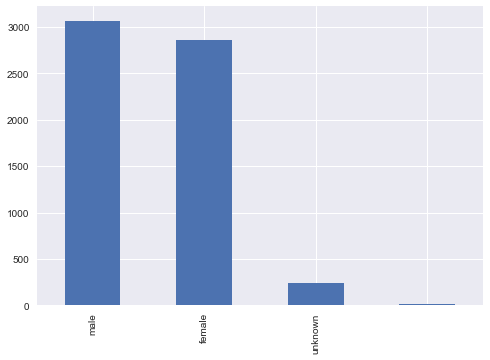

In [192]:
dfUfrnComplete['gender_namsor'].value_counts(sort=True).plot.bar()

In [78]:
dfUfrnComplete[(dfUfrnComplete['gender_namsor'] =='')]['first_name'].value_counts(sort=True)

EUSAMAR      1
MARGARIDA    1
PAULO        1
JULIANA      1
SAVIO        1
SEBASTIAN    1
SANDRO       1
ANDERSON     1
UMBERTO      1
MURILLO      1
ADALBERTO    1
DANIEL       1
MARCUS       1
TATIANE      1
Name: first_name, dtype: int64

We will adjust the names that are unkown in the NAMSOR servise manually. For this, we will all first name finished in 'o', 'os', 'on', 'u', 'us' as male names. The other names, like finished in 'e', 'i', and etc do not follow a constant like male names do with o and u. However, there is a list of know names finished in 'o' that are female names and are:
<ul>
    <li>Aiko</li>
    <li>Amparo</li>
    <li>Anunciação</li>
    <li>Assunção</li>
    <li>Calipso</li>
    <li>Carmo </li>
    <li>Carminho</li>
    <li>Cléo</li>
    <li>Charo</li>
    <li>Clio</li>
    <li>Conceição</li>
    <li>Consolação</li>
    <li>Consuelo</li>
    <li>Dido</li>
    <li>Erato</li>
    <li>Índigo</li>
    <li>Ino</li>
    <li>Io</li>
    <li>Izaro</li>
    <li>Juno</li>
    <li>Keiko</li>
    <li>Lerato</li>
    <li>Leto</li>
    <li>Lilo</li>
    <li>Lucero</li>
    <li>Margô</li>
    <li>Mirto</li>
    <li>Purificação</li>
    <li>Rocío</li>
    <li>Rosário</li>
    <li>Rosarinho</li>
    <li>Socorro</li>
    <li>Tamiko</li>
    <li>Tariro</li>
    <li>Temisto</li>
    <li>Yoko</li>
</ul>
so for this we could seach for the first name:

In [111]:
dfUfrnComplete[dfUfrnComplete['first_name'].str.contains("AIKO | AMPARO | ANUNCIAÇÃO | ASSUNÇÃO | CALIPSO | CARMO  | CARMINHO | CLÉO | CHARO | CLIO | CONCEIÇÃO | CONSOLAÇÃO | CONSUELO | DIDO | ERATO | ÍNDIGO | INO | IO | IZARO | JUNO | KEIKO | LERATO | LETO | LILO | LUCERO | MARGÔ | MIRTO | PURIFICAÇÃO | ROCÍO | ROSÁRIO | ROSARINHO | SOCORRO | TAMIKO | TARIRO | TEMISTO | YOKO")==True]

Empty DataFrame
Columns: [cpf, hrefLevel2, name, emp_enrollment, emp_responsability, emp_responsability_class, emp_responsability_pattern, emp_responsability_reference, emp_responsability_level, emp_UF, emp_UORG, emp_legal_regime, emp_activit, emp_absence_from_work, emp_work_time, emp_last_job_responsability_modification_date, emp_job_responsability_nominee_date, emp_job_responsability_nominee_act, emp_last_job_responsability_modification_date_body, emp_entrance_public_service_legal_document, emp_entrance_public_service_legal_document_number, emp_entrance_public_service_legal_document_date, responsability_description, responsability_activity, responsability_activity_parcial, responsability_UF, responsability_UORG, responsability_sup_body, responsability_last_data_change_resp, url_level_three, emp_month, emp_year, emp_tot_paycheck, emp_irrf, emp_rgps, emp_other_deduction, emp_paycheck_after_deduction, emp_other_receivings, e1, e2, e3, first_name, last_name, gender_pygenderbr, gender_namsor, cpf_region]
Index: []

[0 rows x 46 columns]

as we can see there is no name of the given list se now we can generalize and say that the names that fall in the rule above described are male names

In [112]:
dfUfrnComplete['gender_namsor_adjusted'] = dfUfrnComplete['gender_namsor']

In [136]:
stringname= 'marco'
stringname[-2:]

'co'

In [155]:
#dfUfrnComplete.loc[(dfUfrnComplete['first_name'].str[-1] == 'O') & (dfUfrnComplete['gender_namsor'] =='unknown'),'gender_namsor_adjusted']#= 'male'
#dfUfrnComplete.loc[(dfUfrnComplete['first_name'].str[-2:] == 'ON') & (dfUfrnComplete['gender_namsor'] =='unknown'),'gender_namsor_adjusted'] #= 'male'
#dfUfrnComplete.loc[(dfUfrnComplete['first_name'].str[-1] == 'U') & (dfUfrnComplete['gender_namsor'] =='unknown'),'gender_namsor_adjusted'] #= 'male'
#dfUfrnComplete.loc[(dfUfrnComplete['first_name'].str[-2:] == 'US') & (dfUfrnComplete['gender_namsor'] =='unknown'),'gender_namsor_adjusted'] #= 'male'
#dfUfrnComplete.loc[(dfUfrnComplete['first_name'].str[-2:] == 'OS') & (dfUfrnComplete['gender_namsor'] =='unknown'),'gender_namsor_adjusted'] = 'male'

In [159]:
#dfUfrnComplete[(dfUfrnComplete['first_name'].str[-1] == 'O') & (dfUfrnComplete['gender_namsor'] =='unknown')]
#dfUfrnComplete[(dfUfrnComplete['first_name'].str[-2:] == 'ON') & (dfUfrnComplete['gender_namsor'] =='unknown')]
#dfUfrnComplete[(dfUfrnComplete['first_name'].str[-1] == 'U') & (dfUfrnComplete['gender_namsor'] =='unknown')]
#dfUfrnComplete[(dfUfrnComplete['first_name'].str[-2:] == 'US') & (dfUfrnComplete['gender_namsor'] =='unknown')]
#dfUfrnComplete[(dfUfrnComplete['first_name'].str[-2:] == 'OS') & (dfUfrnComplete['gender_namsor'] =='unknown')]
dfUfrnComplete[(dfUfrnComplete['gender_namsor_adjusted'] =='unknown')]['first_name']

8          ACYNELLY
50          ADLAREG
127        AISLANIA
146         ALBIMAR
147         ALBIMAR
152         ALCIONE
265         ALMARIA
286          ALZENI
290        AMALUSIA
468       ANDERSONN
551          ANEIDE
554        ANELLYSA
610      ANTONIELLI
743        AURIGENA
747       AUZELIVIA
754          AZEMAR
766         BARNORA
767         BARTIRA
794          BONIEK
1027          CHENG
1087     CLAUDIANNY
1143       CRISLUCI
1144    CRISTHIANNE
1324     DERISCLEIA
1329       DEUSIMAR
1381        DJAILDE
1390      DOMINIQUE
1426         EDILZA
1509         EDZANA
1533         ELEDIR
           ...     
5523         SANZIA
5524        SAONARA
5568         SEMELY
5628       SHEYLENA
5673        SISLLEY
5680        SONAYDY
5689      SORANEIDE
5702        SUELENE
5709          SUENI
5710         SUENIA
5713         SULEMI
5724       SUZERICA
5740          TAIZA
5820         THAISE
5823         THAIZA
5832       THATYANE
5924        VALDECY
5927       VALDENIA
6061      WADLEIGHN


In [168]:
#dfUfrnComplete.loc[dfUfrnComplete['first_name'].str.contains("ACYNELLY | AISLANIA | ALCIONE | ALMARIA | AMALUSIA | ANEIDE | ANELLYSA | AURIGENA | AUZELIVIA | BARNORA | CLAUDIANNY | CRISLUCI | CRISTHIANNE | DERISCLEIA | EDILZA | EDZANA | SANZIA | SAONARA | SEMELY | SHEYLENA | SISLLEY | SONAYDY | SORANEIDE | SUELENE | SUENI | SUENIA | SULEMI | SUZERICA | TAIZA | THAISE | THAIZA | THATYANE | VALDECY | VALDENIA | WALANNE | WALDENICE | WANDERLEIA | WANUSIA | WICLIFFE | YULYANNA | ZORAIDE ")==True]['gender_namsor_adjusted'] = 'female'
dfUfrnComplete.loc[dfUfrnComplete['first_name'].str.contains("ACYNELLY|AISLANIA|ALCIONE|ALMARIA|AMALUSIA|ANEIDE|ANELLYSA|AURIGENA|AUZELIVIA|BARNORA|CLAUDIANNY|CRISLUCI|CRISTHIANNE|DERISCLEIA|EDILZA|EDZANA|SANZIA|SAONARA|SEMELY|SHEYLENA|SISLLEY|SONAYDY|SORANEIDE|SUELENE|SUENI|SUENIA|SULEMI|SUZERICA|TAIZA|THAISE|THAIZA|THATYANE|VALDECY|VALDENIA|WALANNE|WALDENICE|WANDERLEIA|WANUSIA|WICLIFFE|YULYANNA|ZORAIDE")]['gender_namsor_adjusted'] = 'female'

/Users/marco/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [161]:
dfUfrnComplete[(dfUfrnComplete['gender_namsor_adjusted'] =='unknown')]['first_name']

8          ACYNELLY
50          ADLAREG
127        AISLANIA
146         ALBIMAR
147         ALBIMAR
152         ALCIONE
265         ALMARIA
286          ALZENI
290        AMALUSIA
468       ANDERSONN
551          ANEIDE
554        ANELLYSA
610      ANTONIELLI
743        AURIGENA
747       AUZELIVIA
754          AZEMAR
766         BARNORA
767         BARTIRA
794          BONIEK
1027          CHENG
1087     CLAUDIANNY
1143       CRISLUCI
1144    CRISTHIANNE
1324     DERISCLEIA
1329       DEUSIMAR
1381        DJAILDE
1390      DOMINIQUE
1426         EDILZA
1509         EDZANA
1533         ELEDIR
           ...     
5523         SANZIA
5524        SAONARA
5568         SEMELY
5628       SHEYLENA
5673        SISLLEY
5680        SONAYDY
5689      SORANEIDE
5702        SUELENE
5709          SUENI
5710         SUENIA
5713         SULEMI
5724       SUZERICA
5740          TAIZA
5820         THAISE
5823         THAIZA
5832       THATYANE
5924        VALDECY
5927       VALDENIA
6061      WADLEIGHN


Another solution to the job of gender classification tryed was the Sexmachine - https://pypi.python.org/pypi/SexMachine/

After some atempts to make it work looks like the librarie has serious issues to be used.

In [226]:
import sexmachine.detector as gender
import sexmachine
d = gender.Detector
d.get_gender(name="Marco")


TypeError: get_gender() missing 1 required positional argument: 'self'

Another option to determine the gender in Brazil is to make use of the GenderBR - https://github.com/meirelesff/genderBR. This library is made in R and instead what we usually find it works offline. Therefore to made use of this library we have to utilize R or interface the R interface with Python. The steps to do it is:
1. Make sure you do have R in the enviroments executing the jupyter
1.1 If not, use 'conda install r-essentials --yes
2. Install the rpy2 interface. This library is the one to interface R in Python.
2

In [236]:
!conda install r-essentials --yes

Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /Users/marco/anaconda:

The following NEW packages will be INSTALLED:

    krb5:           1.14.2-h7298e6d_1      
    libedit:        3.1-hb4e282d_0         
    libgfortran:    3.0.1-h93005f0_2       
    libssh2:        1.8.0-h1218725_2       
    llvm-openmp:    4.0.1-hda82c8b_0       
    r-cellranger:   1.1.0-r342h50a9fb7_0   
    r-cvst:         0.2_1-r342hce93a4b_0   
    r-ddalpha:      1.3.1-r342h4276367_0   
    r-deoptimr:     1.0_8-r342h88b17ca_0   
    r-dimred:       0.1.0-r342hcdfbb48_0   
    r-drr:          0.0.2-r342h1687f97_0   
    r-gower:        0.1.2-r342h52ab46c_0   
    r-ipred:        0.9_6-r342hca986ca_0   
    r-kernlab:      0.9_25-r342h16d16b8_0  
    r-lava:         1.5.1-r342h38a1d13_0   
    r-numderiv:     2016.8_1-r342ha7fd6f4_0
    r-prodlim:      1.6.1-r342h1e7dc4e_0   
    r-rcpproll:     0.2.2-r342h72fe326_0   
    r-recipes:   

libgfortran-3. 100% |################################| Time: 0:00:00   1.34 MB/s
libssh2-1.8.0- 100% |################################| Time: 0:00:00   9.57 MB/s
llvm-openmp-4. 100% |################################| Time: 0:00:00  11.46 MB/s
tk-8.6.7-h35a8 100% |################################| Time: 0:00:00   5.66 MB/s
xz-5.2.3-h0278 100% |################################| Time: 0:00:00   5.35 MB/s
zlib-1.2.11-hf 100% |################################| Time: 0:00:00   1.35 MB/s
libpng-1.6.32- 100% |################################| Time: 0:00:00   7.67 MB/s
icu-58.2-h4b95 100% |################################| Time: 0:00:05   4.31 MB/s
libtiff-4.0.8- 100% |################################| Time: 0:00:00   3.68 MB/s
ncurses-6.0-hd 100% |################################| Time: 0:00:00   3.60 MB/s
libedit-3.1-hb 100% |################################| Time: 0:00:00   2.67 MB/s
readline-7.0-h 100% |################################| Time: 0:00:00   4.89 MB/s
krb5-1.14.2-h7 100% |#######

In [238]:
!conda install rpy2 --yes

Fetching package metadata .............
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /Users/marco/anaconda:
#
rpy2                      2.9.0           py36r342h301bfa9_0  


In [241]:
import rpy2.interactive as r
#import rpy2.interactive.packages

ImportError: dlopen(/Users/marco/anaconda/lib/python3.6/site-packages/rpy2/rinterface/_rinterface.cpython-36m-darwin.so, 2): Library not loaded: @rpath/libiconv.2.dylib
  Referenced from: /Users/marco/anaconda/lib/python3.6/site-packages/rpy2/rinterface/_rinterface.cpython-36m-darwin.so
  Reason: Incompatible library version: _rinterface.cpython-36m-darwin.so requires version 9.0.0 or later, but libiconv.2.dylib provides version 8.0.0

In [ ]:
r.packages.importr("genderBR")

In [ ]:
rlib = r.packages.packages
rlib.genderBR

In [ ]:
resp_array = rlib.genderBR.get_gender(first_name)
if (resp_array is not None) and (len(resp_array) > 0):
    gender = resp_array[0]

In [107]:
dfUfrnComplete.first_name

0             ABDO
1           ABMAEL
2            ABNER
3          ABRAHAO
4           ACACIA
5           ACACIO
6          ACILENE
7             ACSA
8         ACYNELLY
9              ADA
10             ADA
11             ADA
12         ADAILDE
13         ADAILDO
14        ADAILSON
15        ADAILTON
16           ADALA
17       ADALBERTO
18       ADALBERTO
19       ADALBERTO
20        ADALGIZA
21            ADAM
22           ADAMO
23          ADAUTO
24          ADAUTO
25          ADAUTO
26         ADDISON
27         ADEILDE
28         ADEILZE
29        ADELAIDE
           ...    
6150        YASMIN
6151         YCARO
6152       YOLANDA
6153          YOLE
6154      YULYANNA
6155          YURI
6156          YURI
6157          YURI
6158          YURI
6159          YURI
6160          YURI
6161      ZACARIAS
6162         ZAIRA
6163          ZAMA
6164         ZANIA
6165         ZANIA
6166    ZANKENNEDY
6167        ZAQUEU
6168         ZELIA
6169       ZENAIDE
6170      ZENEWTON
6171       Z

In [108]:
dfUfrnComplete.head(10)

cpf                                         hrefLevel2  \
0  ***.094.550-**  OrgaoExercicio-DetalhaServidor.asp?IdServidor=...   
1  ***.942.324-**  OrgaoExercicio-DetalhaServidor.asp?IdServidor=...   
2  ***.270.284-**  OrgaoExercicio-DetalhaServidor.asp?IdServidor=...   
3  ***.768.074-**  OrgaoExercicio-DetalhaServidor.asp?IdServidor=...   
4  ***.013.113-**  OrgaoExercicio-DetalhaServidor.asp?IdServidor=...   
5  ***.793.704-**  OrgaoExercicio-DetalhaServidor.asp?IdServidor=...   
6  ***.245.464-**  OrgaoExercicio-DetalhaServidor.asp?IdServidor=...   
7  ***.827.884-**  OrgaoExercicio-DetalhaServidor.asp?IdServidor=...   
8  ***.264.124-**  OrgaoExercicio-DetalhaServidor.asp?IdServidor=...   
9  ***.658.549-**  OrgaoExercicio-DetalhaServidor.asp?IdServidor=...   

                                         name emp_enrollment  \
0                            ABDO FARRET NETO        167****   
1                  ABMAEL BEZERRA DE OLIVEIRA        034****   
2                  ABNER CARLOS COSTA DE MELO        215****   
3  ABRAHAO SANDERSON NUNES FERNANDES DA SILVA        166****   
4                ACACIA JESSICA MAIA DE MOURA        204****   
5                    ACACIO MEDEIROS NOGUEIRA        034****   
6         ACILENE MARIA BORGES GOMES OLIVEIRA        034****   
7            ACSA NARA DE ARAUJO BRITO BARROS        240****   
8               ACYNELLY DAFNE DA SILVA NUNES              0   
9                      ADA CRISTINA SCUDELARI        122****   

                 emp_responsability emp_responsability_class  \
0  PROFESSOR DO MAGISTERIO SUPERIOR                        6   
1  PROFESSOR DO MAGISTERIO SUPERIOR                        6   
2          TECNICO EM ELETROTECNICA                        D   
3  PROFESSOR DO MAGISTERIO SUPERIOR                        6   
4                 ASSISTENTE SOCIAL                        E   
5                TECNOLOGO-FORMACAO                        E   
6              AUX EM ADMINISTRACAO                        C   
7         NUTRICIONISTA-HABILITACAO                        E   
8                                                          0   
9  PROFESSOR DO MAGISTERIO SUPERIOR                        8   

  emp_responsability_pattern emp_responsability_reference  \
0                                                           
1                                                           
2                        103                                
3                                                           
4                        403                                
5                        416                                
6                        416                                
7                        101                                
8                          0                            0   
9                                                           

  emp_responsability_level                                    emp_UF  \
0                      601        DEPARTAMENTO DE MEDICINA INTEGRADA   
1                      604       DEPARTAMENTO DE ENGENHARIA ELETRICA   
2                             DEPTO DE FISICA TEORICA E EXPERIMENTAL   
3                      601            DEPARTAMENTO DE HISTORIA-CERES   
4                                 ESCOLA AGRICOLA DE JUNDIAI - UAECA   
5                                PRO-REITORIA DE ASSUNTOS ESTUDANTIS   
6                                                 GABINETE DO REITOR   
7                           FACULDADE DE CIENCIAS DA SAUDE DO TRAIRI   
8                        0                                             
9                      801          DEPARTAMENTO DE ENGENHARIA CIVIL   

                         ...                          \
0                        ...                           
1                        ...                           
2                        ...                           
3                        ...                           
4                        ...                           
5         

In [48]:
from pygenderbr import Gender
gapi = Gender()

In [54]:
for i in range(1,len(dfUfrnComplete)):
    nome = dfUfrnComplete.iloc[i]['first_name']
    gender_api = gapi.getgender(nome)
    dfUfrnComplete.loc(i)['gender_pygenderbr'] = gender_api

ValueError: No axis named 2 for object type <class 'pandas.core.frame.DataFrame'>

Another library tested is the gender-guesser. This library is a fork of the sexmachine library, no longer maintained as we
https://pypi.python.org/pypi/gender-guesser/#downloads


>```
!pip install gender-guesser
```


In [169]:
import gender_guesser.detector as gender

In [184]:
def requestgender_genderguesser(row):
    try:
        d = gender.Detector()
        name = row['first_name']
        return d.get_gender(name.title())
    except:
        return 'unknown'

In [185]:
d = gender.Detector()
#print(d.get_gender((u"LISSA").title()))
#print(d.get_gender(u"Sally"))
#print(d.get_gender(u"Pauley")) # should be androgynous

dfUfrnComplete['gender_genderguesser'] = dfUfrnComplete.apply(requestgender_genderguesser, axis=1)



In [187]:
dfUfrnComplete['gender_genderguesser'].value_counts(sort=True)

male             2164
female           2069
unknown          1922
andy               10
mostly_female       8
mostly_male         7
Name: gender_genderguesser, dtype: int64

<a id='eda'></a>
## Exploratory Data Analisys - EDA
### UFRN in numbers by gender
---


<div style="text-align: justify;">
In the year of 2000 was constituted the Lei de Responsabilidade Fiscal a budget and fiscal law for expenditures in the municipalities of Brazil. One of the main points in this law is about the transparency what is called acitve transparency that is the town hall, the legislative chamber and the other bodies of the government has to open the data in his following transparency portals. After that we had the Lei de Acesso à Informação another law with the aim to make improvments in the transparency portal as well as the access to information and know covering the passive transparency that is when the citizes asks for government information not available in the transparency portal. One one the points that the transparency portal has to obbey is to masks all the private data and it is what happens with http://www.portaldatransparencia.gov.br/ that masks the CPF number of the employees. But knowing the structure of the CPF we could analyse from the last number, excluding the check number (two last digits) we could map from where is the origin of the person. So we made a simple function to label from where the employees of UFRN came from according to https://pt.wikipedia.org/wiki/Cadastro_de_pessoas_f%C3%ADsicas and https://janio.sarmento.org/curiosidade-identificacao-de-cpf-conforme-o-estado/ we do have that the last digit has the correlation bellow:
<br>

<img src="https://upload.wikimedia.org/wikipedia/commons/d/d5/Brazil_Fiscal_regions_Labelled_Map.svg" alt="Fiscal regions" width="450"/>
</div>
<ul>
    <li><strong>0</strong> - Rio Grande do Sul</li>
    <li><strong>1</strong> - Distrito Federal, Goiás, Mato Grosso, Mato Grosso do Sul e Tocantins</li>
    <li><strong>2</strong> - Amazonas, Pará, Roraima, Amapá, Acre e Rondônia</li>
    <li><strong>3</strong> - Ceará, Maranhão e Piauí</li>
    <li><strong>4</strong> - Paraíba, Pernambuco, Alagoas e Rio Grande do Norte</li>
    <li><strong>5</strong> - Bahia e Sergipe</li>
    <li><strong>6</strong> - Minas Gerais</li>
    <li><strong>7</strong> - Rio de Janeiro e Espírito Santo</li>
    <li><strong>8</strong> - São Paulo</li>
    <li><strong>9</strong> - Paraná e Santa Catarina</li>
</ul>


In [68]:
def label_region (row):
    if row['cpf'][10:11] == '1':
        return 'Distrito Federal, Goiás, Mato Grosso, Mato Grosso do Sul e Tocantins'
    if row['cpf'][10:11] == '2':
        return 'Amazonas, Pará, Roraima, Amapá, Acre e Rondônia'
    if row['cpf'][10:11] == '3':
        return 'Ceará, Maranhão e Piauí'
    if row['cpf'][10:11] == '4':
        return 'Paraíba, Pernambuco, Alagoas e Rio Grande do Norte'
    if row['cpf'][10:11] == '5':
        return 'Bahia e Sergipe'
    if row['cpf'][10:11] == '6':
        return 'Minas Gerais'
    if row['cpf'][10:11] == '7':
        return 'Rio de Janeiro e Espírito Santo'
    if row['cpf'][10:11] == '8':
        return 'São Paulo'
    if row['cpf'][10:11] == '9':
        return 'Paraná e Santa Catarina'
    if row['cpf'][10:11] == '0':
        return 'Rio Grande do Sul'
    return ''

In [69]:
# Apply label by CPF locale information
dfUfrnComplete['cpf_region'] = dfUfrnComplete.apply(label_region, axis=1)

In [70]:
#dfUfrn['cpf_region'].value_counts(sort=True)
#ufrnOrigin = dfUfrn.pivot_table(index=['cpf_region'], values='mean_estimate', aggfunc=np.mean)

#ufrnOrigin = dfUfrn.pivot_table(index=['cpf_region'], values='X', rows='Y', cols='Z', aggfunc=lambda x: x.value_counts().count())
#ufrnOrigin = dfUfrn.pivot_table(index=['cpf_region'],  aggfunc='count')
ufrnOrigin = dfUfrnComplete['cpf_region'].value_counts(sort=True).reset_index()
ufrnOrigin.columns=['name', 'count']
ufrnOrigin

name  count
0  Paraíba, Pernambuco, Alagoas e Rio Grande do N...   5112
1                                          São Paulo    238
2                            Ceará, Maranhão e Piauí    205
3                    Rio de Janeiro e Espírito Santo    173
4                                       Minas Gerais     99
5  Distrito Federal, Goiás, Mato Grosso, Mato Gro...     84
6                                  Rio Grande do Sul     81
7                            Paraná e Santa Catarina     68
8                                    Bahia e Sergipe     64
9    Amazonas, Pará, Roraima, Amapá, Acre e Rondônia     56

In [72]:
# import geojson file about natal neighborhood
fiscal_region = os.path.join('geojson', 'mapCPF.geojson')

# load the data and use 'UTF-8'encoding
geo_json_fiscal = json.load(open(fiscal_region,encoding='UTF-8'))

In [73]:
fiscal = []
# list all neighborhoods
for neigh in geo_json_fiscal['features']:
        fiscal.append(neigh['properties']['name'])

fiscal

['Paraíba, Pernambuco, Alagoas e Rio Grande do Norte',
 'Rio Grande do Sul',
 'Paraná e Santa Catarina',
 'São Paulo',
 'Bahia e Sergipe',
 'Ceará, Maranhão e Piauí',
 'Rio de Janeiro e Espírito Santo',
 'Minas Gerais',
 'Distrito Federal, Goiás, Mato Grosso, Mato Grosso do Sul e Tocantins',
 'Amazonas, Pará, Roraima, Amapá, Acre e Rondônia']

In [74]:
colorscaleFiscalRegion = linear.OrRd.scale(ufrnOrigin['count'].min(), ufrnOrigin['count'].max())
colorscaleFiscalRegion

# create a threshold of legend
#threshold_scale = np.linspace(ufrnOrigin['count'].min(),
#                              ufrnOrigin['count'].max(), 6, dtype=int).tolist()
threshold_scale = [ufrnOrigin['count'].min(), 80, 150, 200,  ufrnOrigin['count'].max()]

In [75]:
# Create a map object
m = folium.Map(
    location=[-14.150767, -51.057477],
    zoom_start=4,
    tiles='cartodbpositron'
)
#
m.choropleth(
    geo_data=geo_json_fiscal,
    data=ufrnOrigin,
    columns=['name', 'count'],
    key_on='feature.properties.name',
    fill_color='OrRd',
    legend_name='UFRN - Employee region of nascence',
    highlight=True,
    threshold_scale = threshold_scale,
    line_color='red',
    line_weight=0.2,
    line_opacity=0.6
)

Bellow we have a choropleth according to the last digit of CPF. This digit represent the fiscal regions extracted from the last tirth most right digit from CPF. As we can notice the region redish is the one with the most nascence region of UFRN's employees and its is the 4th fiscal region. Following the 4th comes the 8th (São Paulo) and 3th (Ceará, Maranhão and Piauí) fiscal regions.

In [76]:
m

In [194]:
dfUfrnComplete.columns

Index(['cpf', 'hrefLevel2', 'name', 'emp_enrollment', 'emp_responsability',
       'emp_responsability_class', 'emp_responsability_pattern',
       'emp_responsability_reference', 'emp_responsability_level', 'emp_UF',
       'emp_UORG', 'emp_legal_regime', 'emp_activit', 'emp_absence_from_work',
       'emp_work_time', 'emp_last_job_responsability_modification_date',
       'emp_job_responsability_nominee_date',
       'emp_job_responsability_nominee_act',
       'emp_last_job_responsability_modification_date_body',
       'emp_entrance_public_service_legal_document',
       'emp_entrance_public_service_legal_document_number',
       'emp_entrance_public_service_legal_document_date',
       'responsability_description', 'responsability_activity',
       'responsability_activity_parcial', 'responsability_UF',
       'responsability_UORG', 'responsability_sup_body',
       'responsability_last_data_change_resp', 'url_level_three', 'emp_month',
       'emp_year', 'emp_tot_paycheck', 'emp_

In [198]:
#dfUfrnComplete.groupby(['emp_responsability']['cpf_region']
dfUfrnComplete['emp_responsability'].value_counts(sort=True)

PROFESSOR DO MAGISTERIO SUPERIOR            2107
ASSISTENTE EM ADMINISTRACAO                  709
                                             554
PROFESSOR MAGISTERIO SUPERIOR-SUBSTITUTO     229
AUXILIAR DE ENFERMAGEM                       228
PROFESSOR ENS BASICO TECN TECNOLOGICO        208
TECNICO DE LABORATORIO AREA                  169
MEDICO-AREA                                  167
AUX EM ADMINISTRACAO                         141
VIGILANTE                                    131
ENFERMEIRO-AREA                               98
TECNICO EM ENFERMAGEM                         86
PROFESSOR MAGISTERIO SUPERIOR-TEMPORARIO      81
TEC DE TECNOLOGIA DA INFORMACAO               65
ENGENHEIRO-AREA                               63
TECNICO EM ASSUNTOS EDUCACIONAIS              63
SERVENTE DE LIMPEZA                           62
BIBLIOTECARIO-DOCUMENTALISTA                  58
ADMINISTRADOR                                 38
ASSISTENTE DE LABORATORIO                     37
ASSISTENTE SOCIAL   

In [219]:
dfUfrnComplete['emp_UORG'].value_counts(sort=True)

UNIVERSIDADE FED. DO RIO GRANDE DO NORTE    4762
                                             579
ESCOLA AGRICOLA DE JUNDIAI - UAECA            24
FACULDADE DE CIENCIAS DA SAUDE DO TRAIRI      23
DEPARTAMENTO DE MEDICINA INTEGRADA            20
HOSPITAL UNIVERSITARIO ONOFRE LOPES           19
SUPERINTENDENCIA DE INFRA-ESTRUTURA           17
GABINETE DO REITOR                            15
ESCOLA DE SAUDE DA UFRN                       15
MATERNIDADE ESCOLA JANUARIO CICCO             14
ESCOLA DE MUSICA - UAEM                       14
DEPARTAMENTO DE ENGENHARIA CIVIL              13
DEPARTAMENTO DE MEDICINA CLINICA              13
DEPARTAMENTO DE ARTES                         12
DEPARTAMENTO DE CONTABILIDADE E FINANCAS      11
DIRETORIA DE ATENCAO A SAUDE DO SERVIDOR      10
DEPTO DE MICROBIOLOGIA E PARASITOLOGIA        10
INSTITUTO METROPOLE DIGITAL                   10
DEPTO DE INFORMATICA E MAT APLICADA           10
DIRETORIA DE ADMINISTRACAO DE PESSOAL         10
DEPTO DE PRAT EDUCAC

In [213]:
result = dfUfrnComplete.groupby(['emp_responsability','gender_namsor_adjusted'])['emp_responsability'].count().unstack('gender_namsor_adjusted').fillna(0)
result     
#dfUfrnComplete['emp_responsability'].value_counts(sort=True)
#filter = pessoas_tce.groupby(['setor','GENERO'])['setor'].count().unstack('GENERO').fillna(0)
#filter.sum(axis=1).sort_values().plot.barh(figsize=(17,30))

gender_namsor_adjusted                        female   male  unknown
emp_responsability                                                  
                                         1.0   343.0  197.0     13.0
AAD-AUXILIAR ADMINISTRATIVO              0.0     1.0    0.0      0.0
ADMINISTRADOR                            0.0    14.0   24.0      0.0
ALMOXARIFE                               0.0     0.0    2.0      0.0
ANALISTA DE TEC DA INFORMACAO            0.0     3.0   17.0      1.0
APONTADOR                                0.0     0.0    1.0      0.0
ARMAZENISTA                              0.0     0.0    2.0      0.0
ARQUITETO E URBANISTA                    0.0     5.0    8.0      0.0
ARQUIVISTA                               0.0     2.0    1.0      0.0
ASSIST TECNICO DE GESTAO EM SAUDE        0.0     1.0    0.0      0.0
ASSISTENTE DE ALUNO                      0.0    10.0    6.0      0.0
ASSISTENTE DE DIRECAO E PRODUCAO         0.0     1.0    2.0      0.0
ASSISTENTE DE LABORATORIO                0.0    17.0   17.0      3.0
ASSISTENTE EM ADMINISTRACAO              1.0   285.0  397.0     26.0
ASSISTENTE SOCIAL                        0.0    29.0    3.0      2.0
ATENDENTE DE CONSULTORIO-AREA            0.0     1.0    0.0      0.0
ATENDENTE DE ENFERMAGEM                  0.0     1.0    1.0      0.0
AUDITOR                                  0.0     0.0    3.0      0.0
AUX DE VETERINARIA E ZOOTECNIA           0.0     1.0    1.0      0.0
AUX EM ADMINISTRACAO                     0.0    63.0   76.0      2.0
AUXILIAR DE ANATOMIA E NECROPSIA         0.0     0.0    4.0      0.0
AUXILIAR DE BIBLIOTECA                   0.0     0.0    2.0      0.0
AUXILIAR DE COZINHA                      0.0     2.0    0.0      0.0
AUXILIAR DE CRECHE                       0.0     7.0    5.0      1.0
AUXILIAR DE ELETRICISTA                  0.0     0.0    2.0      0.0
AUXILIAR DE ENFERMAGEM                   0.0   173.0   44.0     11.0
AUXILIAR DE FARMACIA                     0.0     4.0    4.0      1.0
AUXILIAR DE LABORATORIO                  0.0    10.0   12.0      3.0
AUXILIAR DE MECANICA                     0.0     0.0    1.0      0.0
AUXILIAR DE NUTRICAO E DIETETICA         0.0     5.0    3.0      0.0
...                                      ...     ...    ...      ...
TEC EM SEGURANCA DO TRABALHO             0.0     0.0    4.0      0.0
TEC EM TELECOMUNICACAO                   0.0     0.0    1.0      0.0
TECNICO DE LABORATORIO AREA              1.0    67.0   92.0      9.0
TECNICO EM AGROPECUARIA                  0.0     1.0    4.0      0.0
TECNICO EM ALIMENTOS E LATICINIOS        0.0     3.0    0.0      0.0
TECNICO EM ARQUIVO                       0.0     1.0    2.0      1.0
TECNICO EM ARTES GRAFICAS                0.0     0.0    5.0      0.0
TECNICO EM ASSUNTOS EDUCACIONAIS         1.0    35.0   26.0      1.0
TECNICO EM AUDIOVISUAL                   0.0     0.0    1.0      0.0
TECNICO EM CONTABILIDADE                 0.0     6.0   11.0      0.0
TECNICO EM EDIFICACOES                   0.0     2.0    7.0      0.0
TECNICO EM ELETROMECANICA                0.0     0.0    2.0      0.0
TECNICO EM ELETRONICA                    0.0     0.0    4.0      1.0
TECNICO EM ELETROTECNICA                 0.0     1.0   16.0      0.0
TECNICO EM ENFERMAGEM                    0.0    65.0   18.0      3.0
TECNICO EM GEOLOGIA                      0.0     1.0    1.0      0.0
TECNICO EM HIGIENE DENTAL                0.0     2.0    1.0      0.0
TECNICO EM MECANICA                      0.0     0.0    5.0      0.0
TECNICO EM QUIMICA                       0.0     0.0    1.0      0.0
TECNICO EM RADIOLOGIA                    0.0     6.0   14.0      1.0
TECNICO EM SANEAMENTO                    0.0     0.0    1.0      1.0
TECNICO EM SECRETARIADO                  0.0     5.0    2.0      1.0
TECNOLOGO-FORMACAO                       0.0     3.0   13.0      1.0
TELEFONISTA                              0.0     4.0    1.0      0.0
TIPOGRAFO                                0.0     0.0    1.0      0.

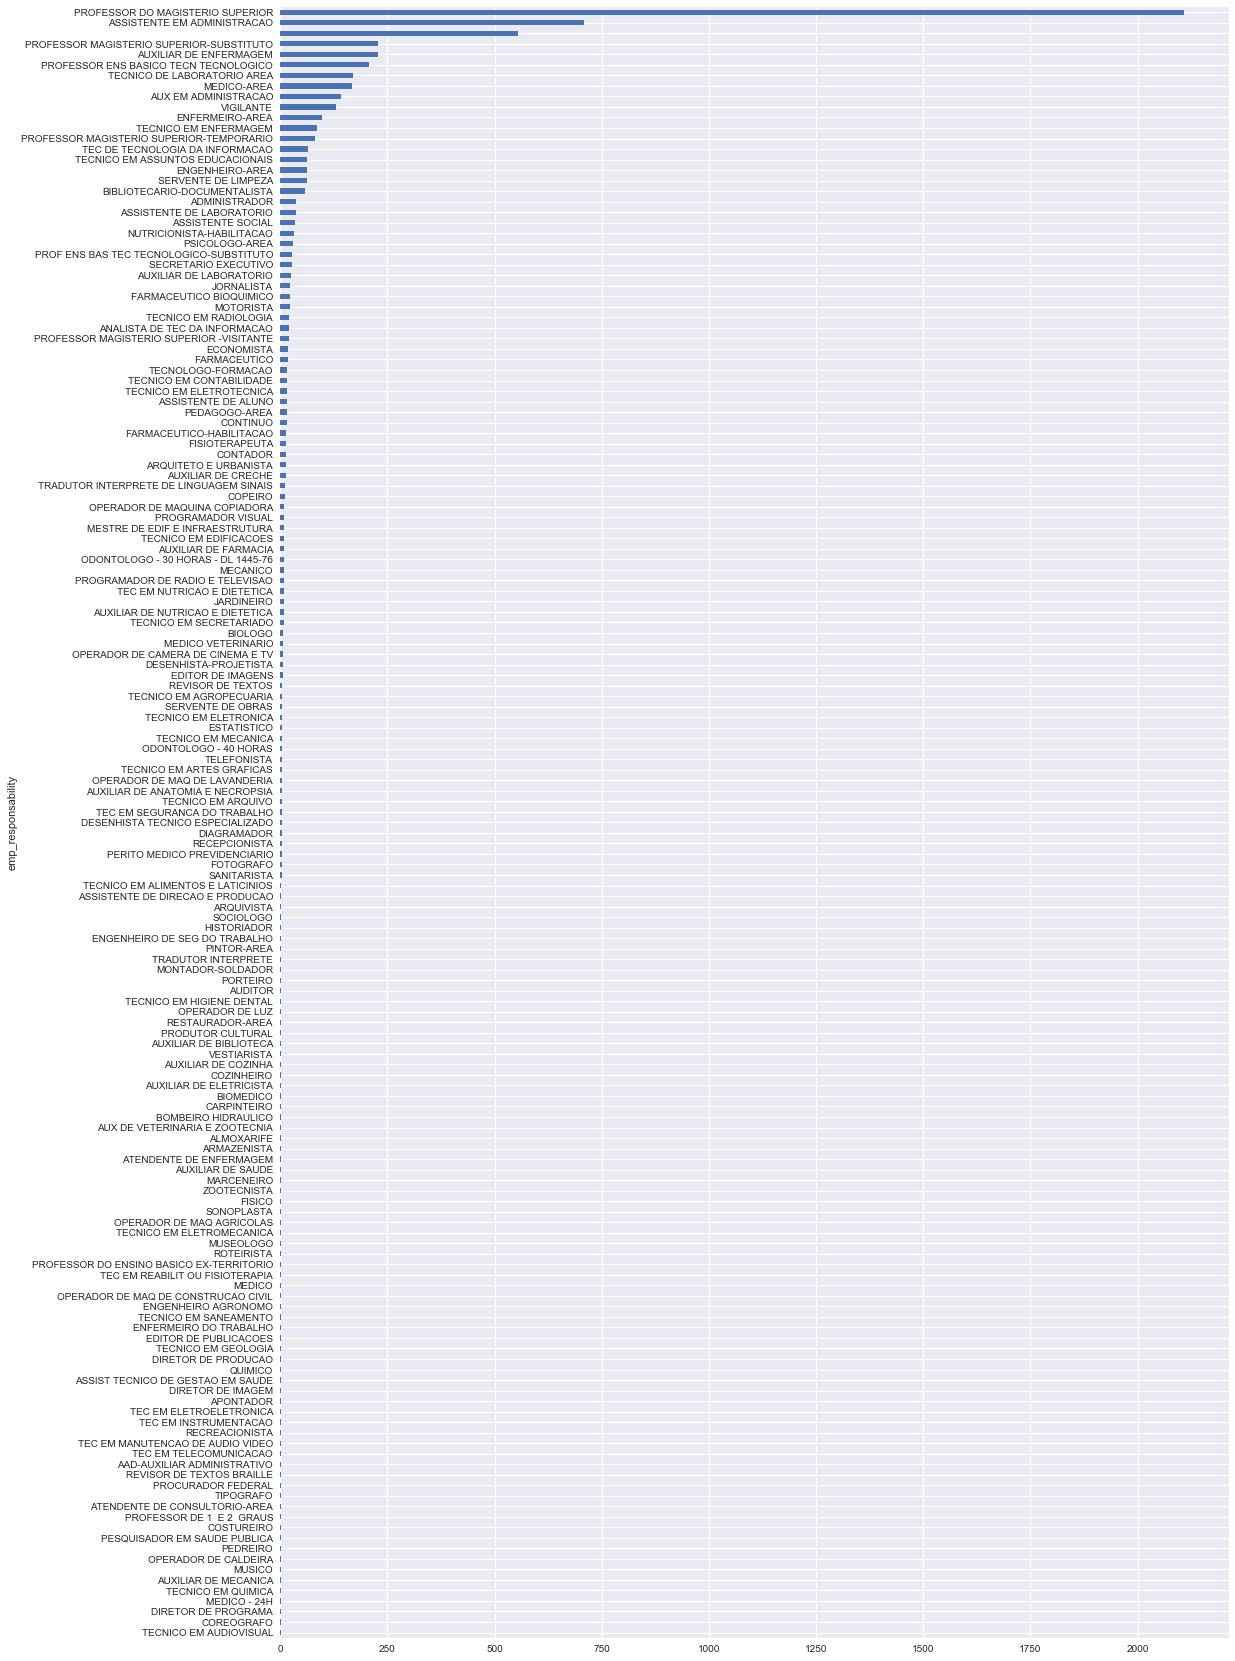

In [216]:
result.sum(axis=1).sort_values().plot.barh(stacked=True,figsize=(17,30))

In [220]:
result = dfUfrnComplete[(dfUfrnComplete['emp_responsability']=='PROFESSOR DO MAGISTERIO SUPERIOR')].groupby(['emp_UORG','gender_namsor_adjusted'])['emp_UORG'].count().unstack('gender_namsor_adjusted').fillna(0)
result

gender_namsor_adjusted                         female   male  unknown
emp_UORG                                                             
                                          0.0     8.0    8.0      0.0
ADMINISTRACAO DO NUCLEO DE NOVA CRUZ      0.0     0.0    1.0      0.0
CENTRO DE CIENCIAS JUR. E SOC. APLICADAS  0.0     1.0    0.0      0.0
DEPARTAMENTO DE ANTROPOLOGIA              0.0     2.0    1.0      0.0
DEPARTAMENTO DE ARQUITETURA               0.0     1.0    3.0      0.0
DEPARTAMENTO DE ARTES                     0.0     3.0    7.0      0.0
DEPARTAMENTO DE BIOQUIMICA                0.0     2.0    1.0      0.0
DEPARTAMENTO DE CIENCIA DA INFORMACAO     0.0     2.0    1.0      0.0
DEPARTAMENTO DE CIENCIAS ADMINISTRATIVAS  0.0     1.0    6.0      0.0
DEPARTAMENTO DE CIENCIAS CONTABEIS        0.0     1.0    5.0      1.0
DEPARTAMENTO DE CIENCIAS SOCIAIS          0.0     1.0    5.0      0.0
DEPARTAMENTO DE CIRURGIA                  0.0     1.0    3.0      0.0
DEPARTAMENTO DE COMUNICACAO SOCIAL        0.0     3.0    5.0      0.0
DEPARTAMENTO DE DIREITO PRIVADO           0.0     2.0    2.0      0.0
DEPARTAMENTO DE DIREITO PUBLICO           0.0     0.0    3.0      0.0
DEPARTAMENTO DE DIREITO-CERES             0.0     0.0    2.0      0.0
DEPARTAMENTO DE ECOLOGIA                  0.0     2.0    0.0      0.0
DEPARTAMENTO DE ECONOMIA                  0.0     1.0    4.0      0.0
DEPARTAMENTO DE EDUCACAO FISICA           0.0     1.0    7.0      0.0
DEPARTAMENTO DE EDUCACAO-CERES            0.0     2.0    1.0      0.0
DEPARTAMENTO DE ENFERMAGEM                0.0     8.0    0.0      0.0
DEPARTAMENTO DE ENGENHARIA BIOMEDICA      0.0     0.0    1.0      1.0
DEPARTAMENTO DE ENGENHARIA CIVIL          0.0     6.0    6.0      0.0
DEPARTAMENTO DE ENGENHARIA DE MATERIAIS   0.0     1.0    4.0      0.0
DEPARTAMENTO DE ENGENHARIA DE PETROLEO    0.0     1.0    1.0      1.0
DEPARTAMENTO DE ENGENHARIA DE PRODUCAO    0.0     1.0    3.0      0.0
DEPARTAMENTO DE ENGENHARIA ELETRICA       0.0     0.0    4.0      0.0
DEPARTAMENTO DE ENGENHARIA MECANICA       0.0     0.0    4.0      0.0
DEPARTAMENTO DE ENGENHARIA QUIMICA        0.0     2.0    3.0      0.0
DEPARTAMENTO DE ENGENHARIA TEXTIL         0.0     1.0    2.0      0.0
...                                       ...     ...    ...      ...
DEPARTAMENTO DE TOCO-GINECOLOGIA          0.0     3.0    0.0      0.0
DEPARTAMENTO DE TURISMO                   0.0     0.0    3.0      1.0
DEPT DE DIREITO PROCESSUAL PROPEDEUTICA   0.0     2.0    1.0      0.0
DEPTO DE ANALISES CLINIC E TOXICOLOGICAS  0.0     2.0    0.0      0.0
DEPTO DE BIOFISICA E FARMACOLOGIA         0.0     1.0    5.0      0.0
DEPTO DE BIOLOGIA CELULAR E GENETICA      0.0     3.0    1.0      0.0
DEPTO DE BOTANICA E ZOOLOGIA              0.0     1.0    3.0      0.0
DEPTO DE CIENCIAS ATMOSFERICAS E CLIMATI  0.0     1.0    1.0      0.0
DEPTO DE CIENCIAS EXATAS E APLICADAS      0.0     1.0    4.0      0.0
DEPTO DE CIENCIAS SOCIAIS E HUMANAS       0.0     2.0    0.0      1.0
DEPTO DE DEMOGRAFIA E CIENCIAS ATUARIAIS  0.0     1.0    2.0      0.0
DEPTO DE ENG DE COMPUTACAO E AUTOMACAO    0.0     0.0    6.0      0.0
DEPTO DE ENGENHARIA DE COMUNICACOES       0.0     0.0    4.0      0.0
DEPTO DE FISICA TEORICA E EXPERIMENTAL    0.0     2.0    6.0      0.0
DEPTO DE FUND E POLITICAS DA EDUCACAO     0.0     3.0    1.0      0.0
DEPTO DE INFORMATICA E MAT APLICADA       0.0     2.0    6.0      0.0
DEPTO DE LING E LITER ESTRANG MODERNAS    0.0     2.0    4.0      0.0
DEPTO DE MICROBIOLOGIA E PARASITOLOGIA    0.0     5.0    1.0      1.0
DEPTO DE OCEANOGRAFIA E LIMNOLOGIA        0.0     1.0    2.0      0.0
DEPTO DE PRAT EDUCACIONAIS E CURRICULO    0.0     6.0    3.0      0.0
ESCOLA AGRICOLA DE JUNDIAI - UAECA        0.0     2.0    7.0      0.0
ESCOLA DE CIENCIAS E TECNOLOGIA - UAECT   0.0     4.0    4.0      0.0
ESCOLA DE MUSICA - UAEM                   0.0     1.0    1.0      0.0
ESCOLA MULTICAMPI DE CIENCIAS MEDICAS     0.0     3.0    3.0      0.0
FACULDADE 

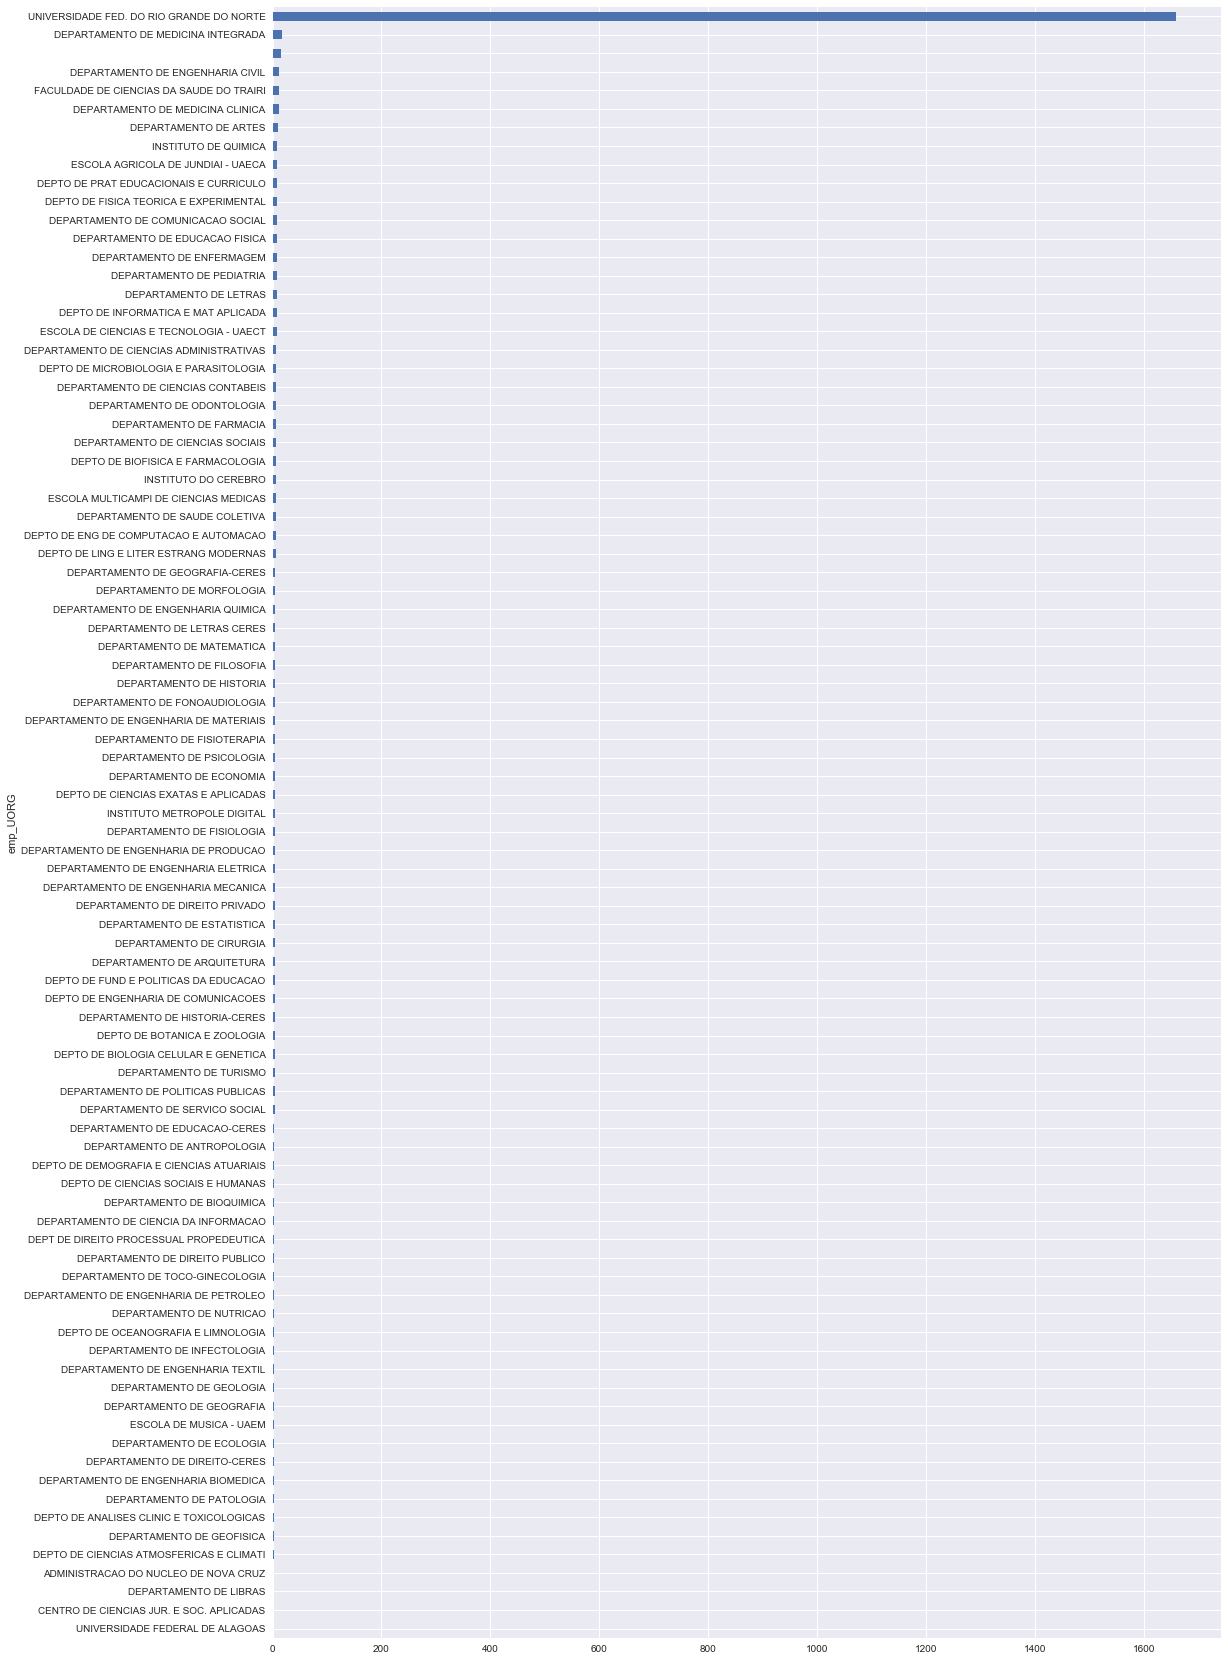

In [221]:
result.sum(axis=1).sort_values().plot.barh(stacked=True,figsize=(17,30))

In [234]:
dfUfrnComplete['emp_tot_paycheck'] = dfUfrnComplete.astype('double', copy=False)
#dfUfrnComplete.loc[(dfUfrnComplete['emp_tot_paycheck']=='unknown')]
#dfUfrnComplete.loc[(dfUfrnComplete['emp_tot_paycheck'] == '')]#= 'male'
#dfUfrnComplete.loc[(dfUfrnComplete['first_name'].str[-1] == 'O') & (dfUfrnComplete['gender_namsor'] =='unknown'),'gender_namsor_adjusted']#= 'male'
#dfUfrnComplete['emp_tot_paycheck']
#s2 = s1.astype('int', copy=False)
#result = dfUfrnComplete[(dfUfrnComplete['emp_tot_paycheck']>'PROFESSOR DO MAGISTERIO SUPERIOR')].groupby(['emp_UORG','gender_namsor_adjusted'])['emp_UORG'].count().unstack('gender_namsor_adjusted').fillna(0)
#result

ValueError: could not convert string to float: 'unknown'

In [235]:
result = dfUfrnComplete[(dfUfrnComplete['emp_responsability']=='PROFESSOR DO MAGISTERIO SUPERIOR')].groupby(['cpf_region','gender_namsor_adjusted'])['cpf_region'].count().unstack('gender_namsor_adjusted').fillna(0)
result

gender_namsor_adjusted                                   female   male  \
cpf_region                                                               
Amazonas, Pará, Roraima, Amapá, Acre e Rondônia     0.0    13.0   11.0   
Bahia e Sergipe                                     0.0    12.0   23.0   
Ceará, Maranhão e Piauí                             0.0    41.0   58.0   
Distrito Federal, Goiás, Mato Grosso, Mato Gros...  1.0    19.0   30.0   
Minas Gerais                                        0.0    33.0   40.0   
Paraná e Santa Catarina                             0.0    20.0   30.0   
Paraíba, Pernambuco, Alagoas e Rio Grande do Norte  3.0   581.0  765.0   
Rio Grande do Sul                                   1.0    38.0   30.0   
Rio de Janeiro e Espírito Santo                     1.0    43.0   69.0   
São Paulo                                           0.0    89.0  101.0   

gender_namsor_adjusted                              unknown  
cpf_region                                                   
Amazonas, Pará, Roraima, Amapá, Acre e Rondônia         3.0  
Bahia e Sergipe                                         1.0  
Ceará, Maranhão e Piauí                                 0.0  
Distrito Federal, Goiás, Mato Grosso, Mato Gros...      2.0  
Minas Gerais                                            1.0  
Paraná e Santa Catarina                                 4.0  
Paraíba, Pernambuco, Alagoas e Rio Grande do Norte     41.0  
Rio Grande do Sul                                       1.0  
Rio de Janeiro e Espírito Santo                         1.0  
São Paulo                                               1.0

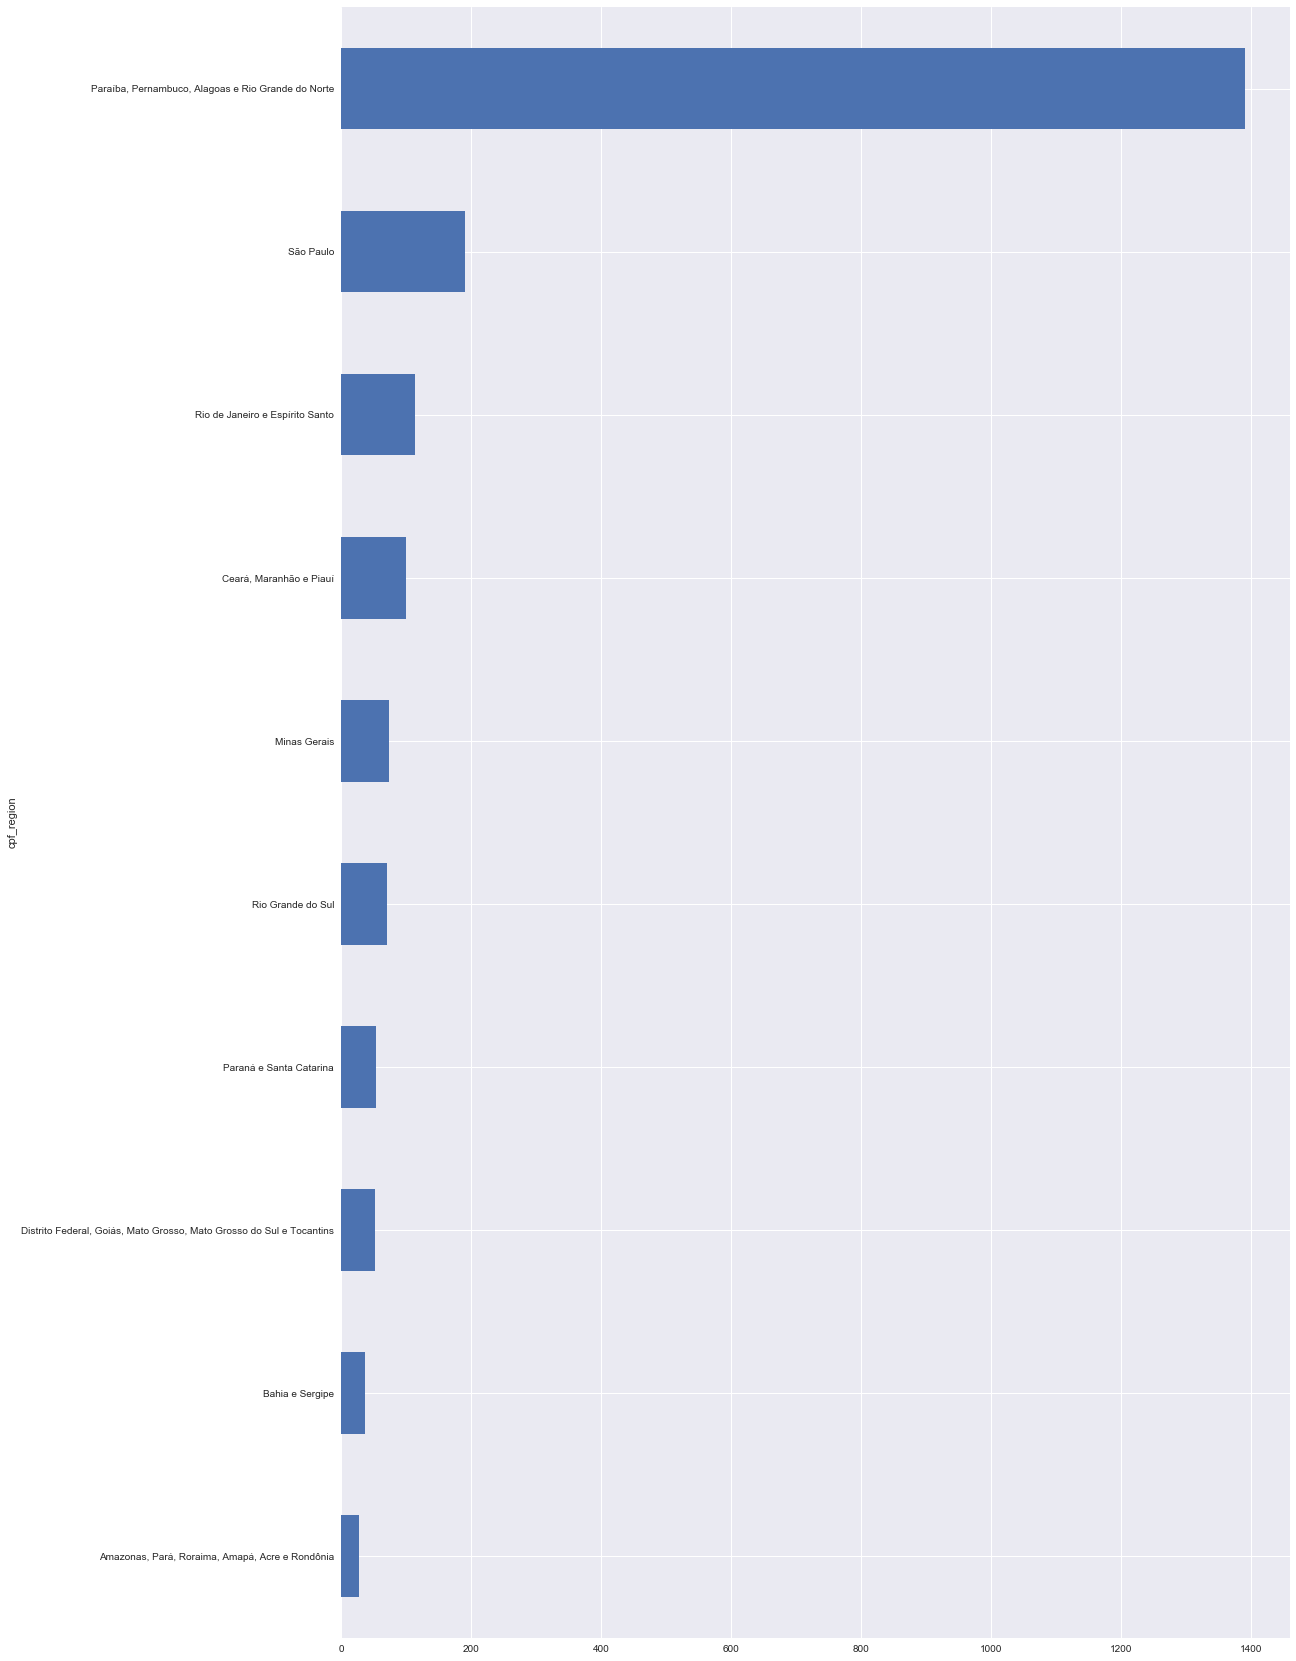

In [244]:
#result['female'] = (-(2*result['female']))+result['female']
result.sum(axis=1).sort_values().plot.barh(figsize=(17,30))